<a href="https://colab.research.google.com/github/AbhayAviSharma/Unsupervised_ML_Clustering/blob/main/Netflix_Unsupervised_ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix TV Shows and Movies Clustering



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Member Name**     - ABHAY SHARMA


# **Project Summary -**

Our project revolves around analyzing a comprehensive dataset of TV shows and movies available on Netflix as of 2019, sourced from Flixable, a third-party Netflix search engine. Notably, Flixable's 2018 report highlighted a significant trend: the exponential growth of TV shows on Netflix since 2010, contrasting with a substantial decline in the number of movies available. In this project, we aim to delve deeper into this dataset, uncovering intriguing insights and trends, ultimately providing a broader perspective on the evolving content landscape of the world's leading streaming service.

Ultimately, this project aspires to provide Netflix with valuable insights into content distribution, viewer preferences, and the evolving landscape of its streaming service. By accomplishing these objectives, we aim to offer actionable recommendations and inform strategic decisions to cater to the ever-changing demands of Netflix subscribers.



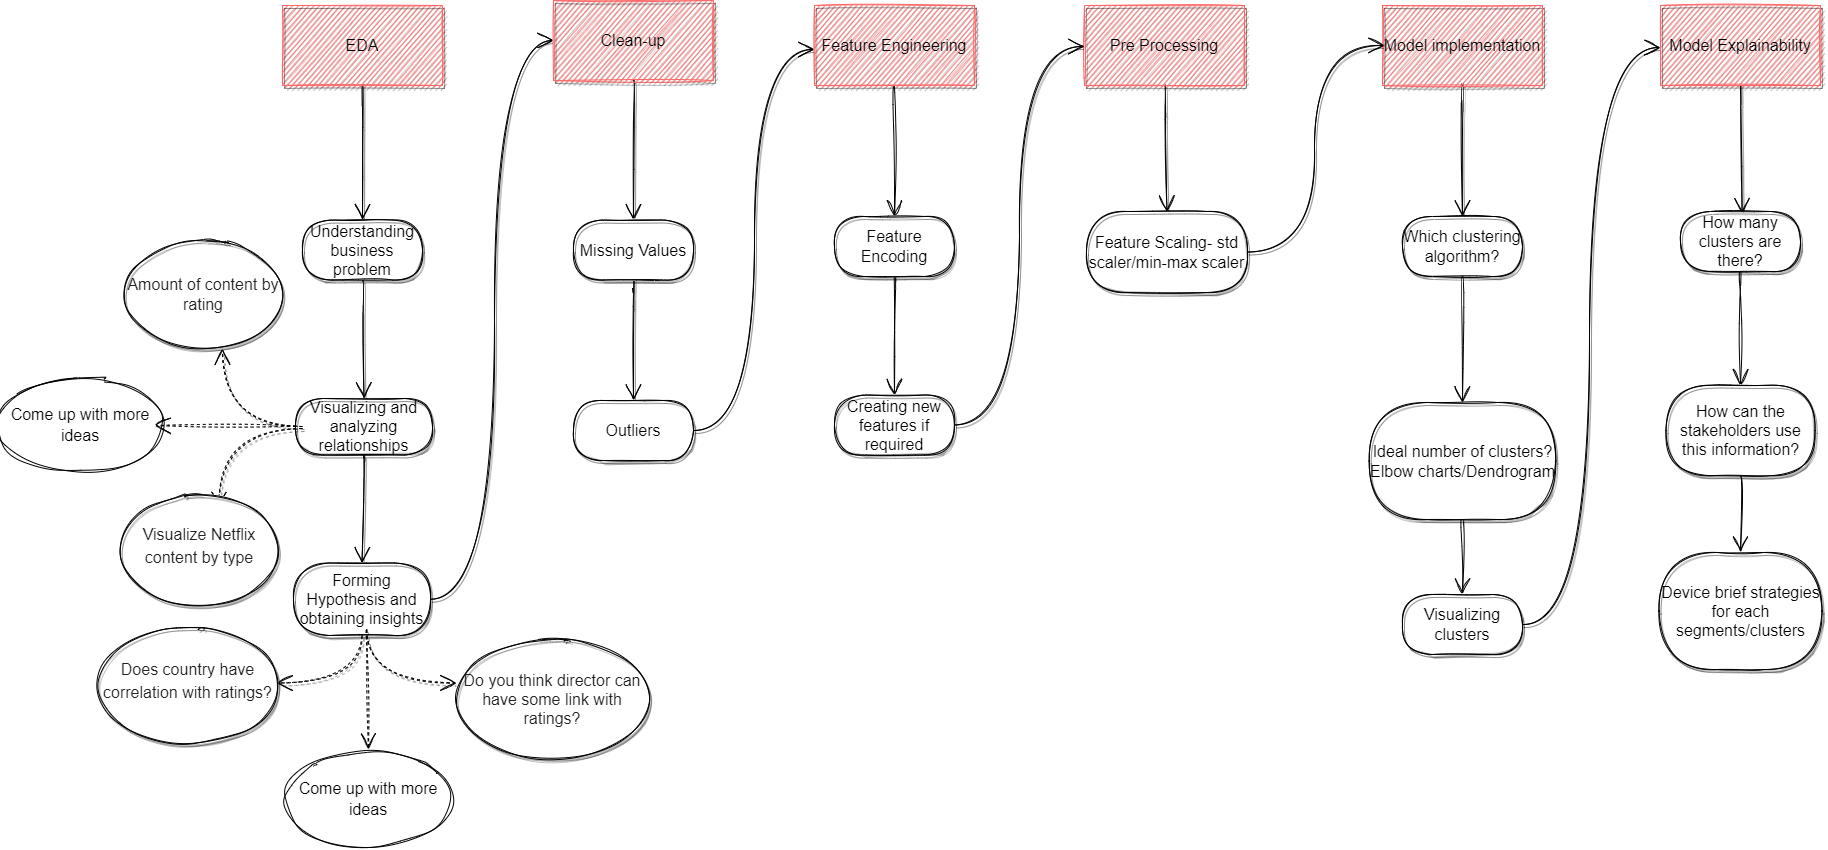


# **GitHub Link -**

https://github.com/AbhayAviSharma

# **Problem Statement**


This project revolves around a comprehensive analysis of a Netflix dataset comprising TV shows and movies available as of 2019. Our primary focus is on efficiently understanding, processing, and extracting valuable insights from the data. The key problem areas and objectives can be summarized as follows:
1. Data Understanding
2. Efficient EDA
3. Effective Data Visualization
4. Data Preprocessing
5. Feature Engineering
6. Hypothesis Testing
7. Model Implementation and Interpretation
8. Insights and Conclusion

# ***Let's Begin !***

## ***1. Knowing our Data***

### Import Libraries

In [360]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats   # for statistics

import nltk    # Natural Language Toolkit (NLTK) library
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [361]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [362]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [363]:
# Dataset First Look
df.T

,0,1,2,3,4,5,6,7,8,9,...,7777,7778,7779,7780,7781,7782,7783,7784,7785,7786
show_id,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s7778,s7779,s7780,s7781,s7782,s7783,s7784,s7785,s7786,s7787
type,TV Show,Movie,Movie,Movie,Movie,TV Show,Movie,Movie,Movie,Movie,...,TV Show,Movie,TV Show,Movie,Movie,Movie,Movie,Movie,TV Show,Movie
title,3%,7:19,23:59,9,21,46,122,187,706,1920,...,Zombie Dumb,Zombieland,Zona Rosa,Zoo,Zoom,Zozo,Zubaan,Zulu Man in Japan,Zumbo's Just Desserts,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
director,NaN,Jorge Michel Grau,Gilbert Chan,Shane Acker,Robert Luketic,Serdar Akar,Yasir Al Yasiri,Kevin Reynolds,Shravan Kumar,Vikram Bhatt,...,NaN,Ruben Fleischer,NaN,Shlok Sharma,Peter Hewitt,Josef Fares,Mozez Singh,NaN,NaN,Sam Dunn
cast,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Elijah Wood, John C. Reilly, Jennifer Connelly...","Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...","Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...","Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...","Samuel L. Jackson, John Heard, Kelly Rowan, Cl...","Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...","Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",...,NaN,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...","Shashank Arora, Shweta Tripathi, Rahul Kumar, ...","Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Nasty C,"Adriano Zumbo, Rachel Khoo",NaN
country,Brazil,Mexico,Singapore,United States,United States,Turkey,Egypt,United States,India,India,...,NaN,United States,Mexico,India,United States,"Sweden, Czech Republic, United Kingdom, Denmar...",India,NaN,Australia,"United Kingdom, Canada, United States"
date_added,"August 14, 2020","December 23, 2016","December 20, 2018","November 16, 2017","January 1, 2020","July 1, 2017","June 1, 2020","November 1, 2019","April 1, 2019","December 15, 2017",...,"July 1, 2019","November 1, 2019","November 26, 2019","July 1, 2018","January 11, 2020","October 19, 2020","March 2, 2019","September 25, 2020","October 31, 2020","March 1, 2020"
release_year,2020,2016,2011,2009,2008,2016,2019,1997,2019,2008,...,2018,2009,2019,2018,2006,2005,2015,2019,2019,2019
rating,TV-MA,TV-MA,R,PG-13,PG-13,TV-MA,TV-MA,R,TV-14,TV-MA,...,TV-Y7,R,TV-MA,TV-MA,PG,TV-MA,TV-14,TV-MA,TV-PG,TV-MA
duration,4 Seasons,93 min,78 min,80 min,123 min,1 Season,95 min,119 min,118 min,143 min,...,2 Seasons,88 min,1 Season,94 min,88 min,99 min,111 min,44 min,1 Season,90 min


### Dataset Rows & Columns count

In [364]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [365]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [366]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [367]:
# Missing Values/Null Values Count
empty_val = df.isnull().sum()
empty_val

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

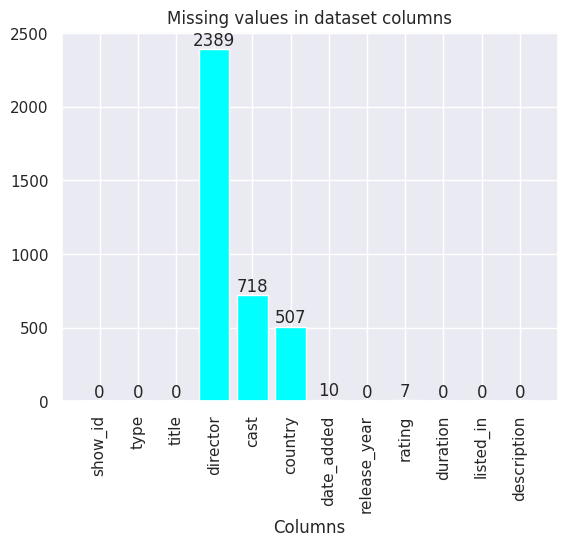

In [368]:
# visualizing missing values
plt.bar(empty_val.index, empty_val.values, color='cyan')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.title('Missing values in dataset columns')
for i,value in enumerate(empty_val.values):
  plt.text(i, value, str(value), ha='center', va='bottom')
plt.show()

### What did you know about your dataset?

Our dataset contains '12' columns and '7787' rows, with '0' duplicated values, but does contain missing values in columns: 'director', 'cast', 'country', 'date_added', 'rating' cotaining '2389', '718', '507', '10' and '7' null values respectively.

## ***2. Understanding Variables***

In [369]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [370]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

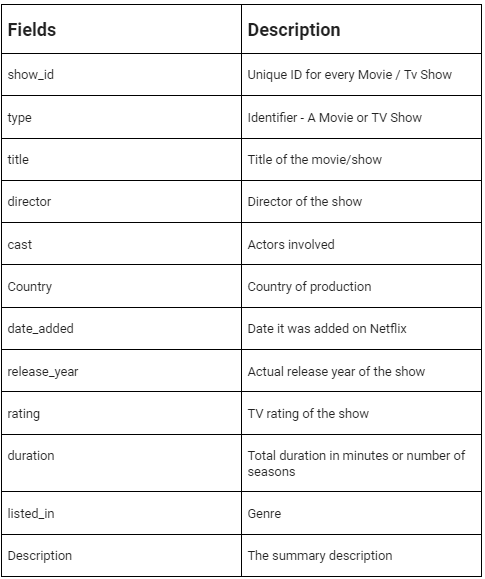

### Check Unique Values for each variable.

In [371]:
# Check Unique Values for each variable
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [372]:
# Let's start by filling null values
# As 'rating' and 'date_added' have very few missing values we can replace missing values with mode values
df['rating'].fillna(df['rating'].mode()[0], inplace=True)   # replacing with most frequent rating to ensure consistency

df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)  # replacing with most frequent dat when content was added

# let's fill columns 'cast' and 'country' with info not available for the time
df['cast'].fillna('N/A', inplace=True)

df['country'].fillna('N/A', inplace=True)

# And let's drop the column 'director' as it contains most null values and is less significant too
df.drop(['director'], axis=1, inplace=True)

In [373]:
# let's check if it worked
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [374]:
# now let's convert datatype of 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# let's compute day, month and year
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [375]:
# dropping column 'date_added'
df.drop('date_added', axis=1, inplace=True)

In [376]:
# let's split data into TV shows and Movies by filtering rows based on 'type' column
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

In [377]:
# manipulations in columns movies and tv_shows
movies.duration = movies.duration.str.replace('min','').astype(int)         # strings removed and converted to 'int' type

tv_shows.rename(columns={'duration':'seasons'}, inplace=True)               # renamed 'duration' to 'seasons'
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)        # standardize format of 'seasons' for consistency
tv_shows.seasons = tv_shows.seasons.str.replace('Seasons','').astype(int)   # removes 'Seasons' string from each entry

In [378]:
# let's create a dictionary to map specific content ratings to broader categories
custom_rating = {'TV-PG':'Older Kids',
                 'TV-Y7':'Older Kids',
                 'TV-Y7-FV':'Older Kids',
                 'PG':'Older Kids',
                 'TV-MA':'Adults',
                 'R':'Adults',
                 'NR':'Adults',
                 'UR':'Adults',
                 'NC-17':'Adults',
                 'TV-14':'Teens',
                 'PG-13':'Teens',
                 'TV-Y':'Kids',
                 'TV-G':'Kids',
                 'G':'Kids'
                 }

In [379]:
# creating a new column
df['ratings_cat'] = df['rating'].replace(to_replace=custom_rating)

# categorical encoding for 'rating_cat' column
df['ratings_cat'] = pd.Categorical(df['ratings_cat'], categories=['Adults', 'Older Kids', 'Teens', 'Kids'])

In [380]:
# categorical encoding for 'type' column
df['type'] = pd.Categorical(df['type'])

In [381]:
# let's convert datatype of necessary columns to string
df['type'] = df['type'].astype('string')
df['cast'] = df['cast'].astype('string')
df['title'] = df['title'].astype('string')
df['rating'] = df['rating'].astype('string')
df['country'] = df['country'].astype('string')
df['listed_in'] = df['listed_in'].astype('string')
df['description'] = df['description'].astype('string')

In [382]:
# Let's make 'show_id' as index
df.set_index('show_id', inplace=True)

In [383]:
# let's split dataset for movies and tv_shows for now
df_movies = df[df['type'] == 'Movie'].copy()
df_shows = df[df['type'] == 'TV Show'].copy()

In [384]:
df.head(2)

,type,title,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,ratings_cat
show_id,,,,,,,,,,,,,
s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Adults
s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Adults


In [385]:
df_movies.head(2)

,type,title,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,ratings_cat
show_id,,,,,,,,,,,,,
s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Adults
s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,Adults


In [386]:
df_shows.head(2)

,type,title,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,ratings_cat
show_id,,,,,,,,,,,,,
s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Adults
s6,TV Show,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1,7,2017,Adults


### What all manipulations have you done and insights you found?

The manipulations we have done are listed below:
1. Filled the missing values in columns 'date_added' and 'rating' by replacing with mode values of columns, and replacing missing values in 'cast' and 'country' with 'N/A' meaning not available, and finally dropping the column 'director' due to presence of most abundant missing values.
2. Converted 'date_added' column data type to 'datetime', then columns 'day_added', 'month_added', and 'year_added', are created to extract and store the day, month and year from the 'date_added' column. also, dropped the 'date_added' column.
3. Splitting data for TV Shows and Movies created by filtering rows based on the 'type' column. Then did necessary manipulations in both to ensure consistency in format.
4. Created a dictionary 'custom_rating' to map specific content ratings to broader categories, then created a column 'ratings_cat' which is populated by mapping the 'rating' column to the 'custom_rating'.
5. Renamed 'listed_in' to 'genre'. Did categorical encoding for columns 'ratings_cat' and 'type', and converted necessary columns to string datatype.
6. At last, set 'show_id' as index and created two seperated dataframes for movies and tv shows named 'df_movies' and 'df_shows' respectively.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

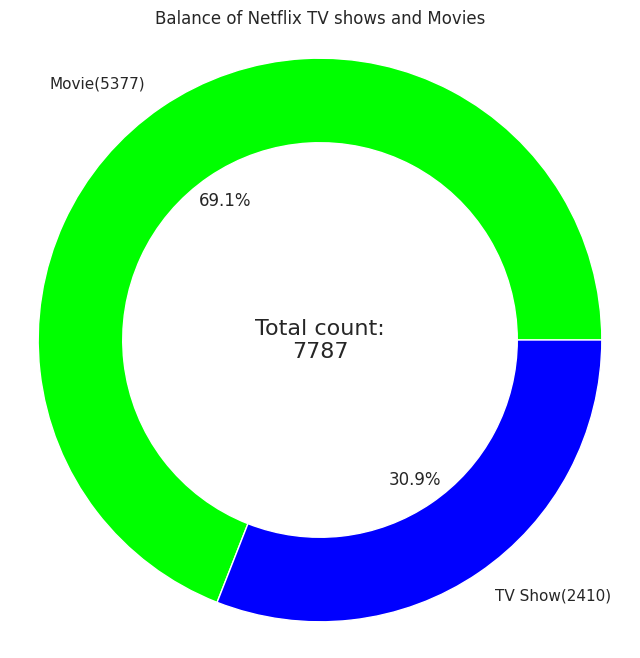

In [387]:
# Chart - 1 visualization code
t_c = df['type'].value_counts()
plt.figure(figsize=(8,8))
# let's create donut chart
plt.pie(t_c, labels=[f'{label}({count})' for label, count in zip(t_c.index, t_c)],
        autopct='%1.1f%%', colors=['lime', 'blue'], wedgeprops={'width':0.3})
plt.title('Balance of Netflix TV shows and Movies')
total_count = len(df)
plt.text(0,0, f'Total count:\n{total_count}', fontsize=16, va='center', ha='center')
plt.axis('equal')    # ensures shape to be circular
plt.show()

##### 1. Why did you pick the specific chart?

A Donut pie chart is a variation of Pie chart and serves a similar purpose of showing the relationship or distribution of parts and their contribution as whole.

##### 2. What is/are the insight(s) found from the chart?

As of our data, number of TV Shows on Netflix are '2410' contributing to a total of 30.9%, while listed Movies are '4377' contributing to a total of 69.1%, of the total '7787' count of content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Having a clear understanding of the distribution of TV shows and movies in the content library allows Netflix to make data-driven decisions that can positively impact content strategy, user engagement, marketing efforts and overall business performance, hence making a positive impact.

#### Chart - 2

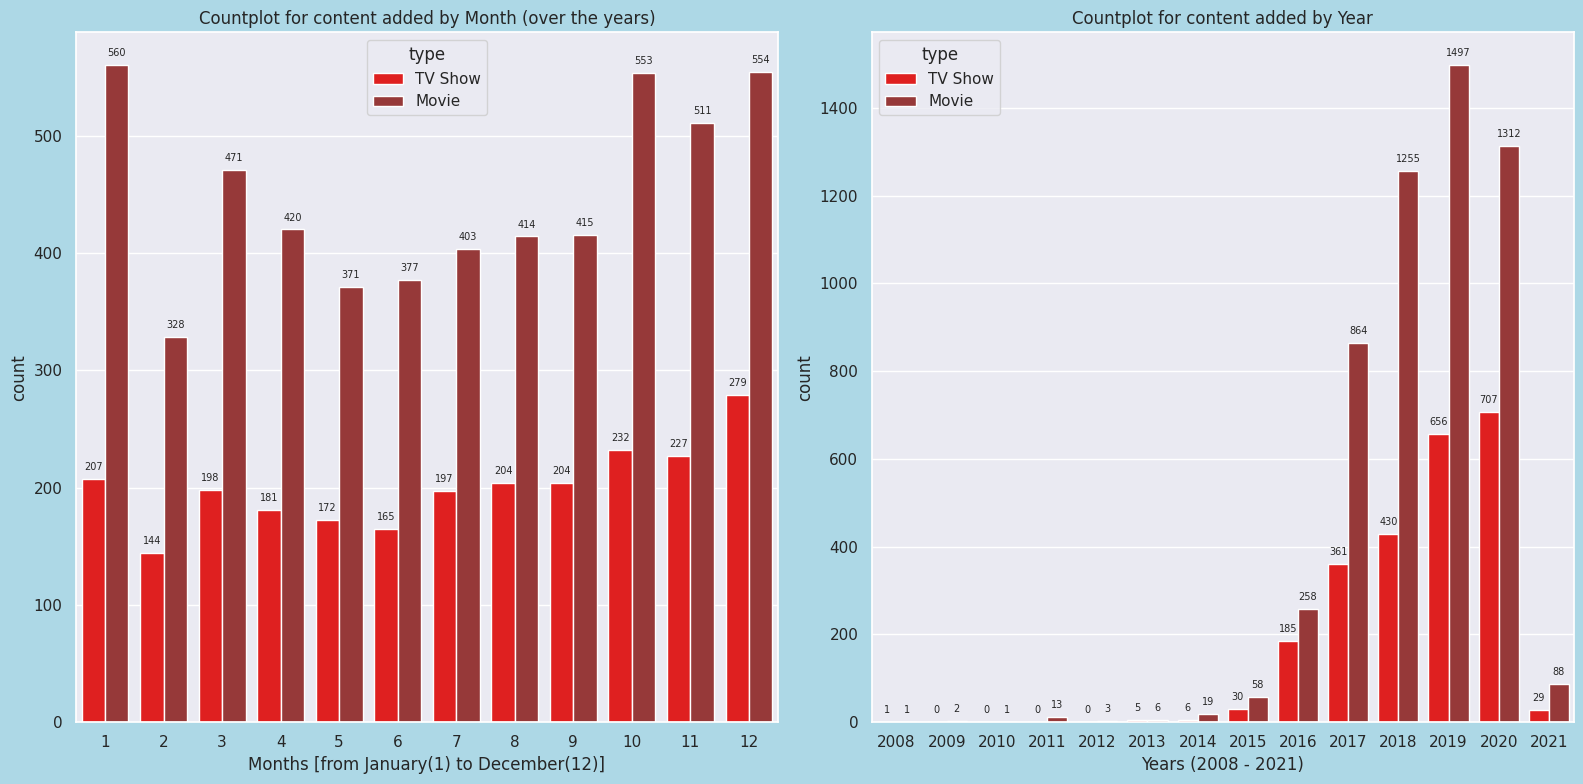

In [388]:
# Chart - 2 visualization code
fig, axes = plt.subplots(1,2,figsize=(16,8))
fig.set_facecolor("lightblue")
# let's create a subplot for content added 'monthly'
ax1 = sns.countplot(data=df, x='month_added', hue='type', palette={'TV Show':'red', 'Movie':'brown'}, ax=axes[0])
axes[0].set_title('Countplot for content added by Month (over the years)')
axes[0].set_xlabel('Months [from January(1) to December(12)]')
axes[0].legend(title='type')

# let's create subplot for content added 'yearwise'
ax2 = sns.countplot(data=df, x='year_added', hue='type', palette={'TV Show':'red', 'Movie':'brown'}, ax=axes[1])
axes[1].set_title('Countplot for content added by Year')
axes[1].set_xlabel('Years (2008 - 2021)')
axes[1].legend(title='type')

# annotating count values on bars
for ax in [ax1,ax2]:
  for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=7, xytext=(0,5), textcoords='offset points')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Countplots are type of categorical plots that are commonly used to display the counts or frequency of categorical data, particularly useful for visualizing the distribution of discrete categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

In our plots above we can clearly see the content added to Netflix by Month and Year for both TV Shows and Movies. Also we can see the count in each month and year for the content added.

It is evident that after year 2014, Netflix went on to add more and more content which is also a sign for it's increasing popularity with year 2019 achieving the peak growth.

Movies added are significantly higher than TV shows, moreover January, October, November and December have been the months with highest content added as these are the months of festivals and New year and with most holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Data-driven strategies are crucial for content platforms to thrive in a competitive market. These insights can help Netflix make informed decisions about content acquisition, production, and promotion, leading to increased user satisfaction, subscriber growth, and a stronger position in the streaming industry.

#### Chart - 3

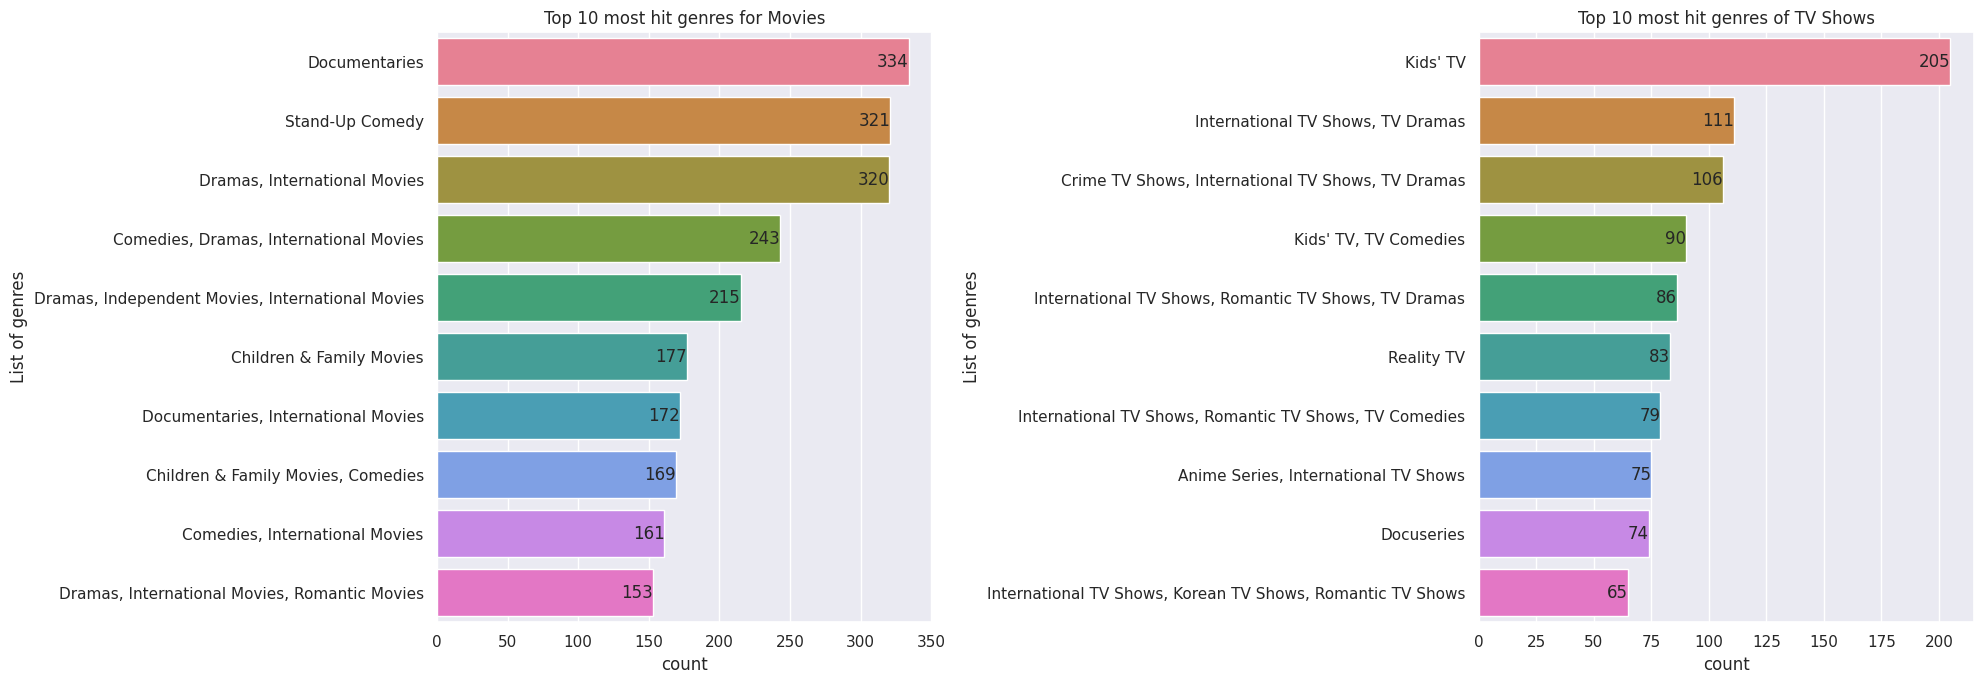

In [389]:
# Chart - 3 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.set(style='darkgrid')
# let's plot top 10 hit genres of Netflix TV shows and Movies
movie_genre = movies['listed_in'].value_counts().head(10)
sns.countplot(y='listed_in', data=movies, order=movie_genre.index, palette="husl", ax=axes[0])
axes[0].set_title('Top 10 most hit genres for Movies')
axes[0].set_ylabel('List of genres')
# let's annotate the bars
for p in axes[0].patches:
  axes[0].annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2), ha='right', va='center')

tvshow_genre = tv_shows['listed_in'].value_counts().head(10)
sns.countplot(y='listed_in', data=tv_shows, order=tvshow_genre.index, palette="husl", ax=axes[1])
axes[1].set_title('Top 10 most hit genres of TV Shows')
axes[1].set_ylabel('List of genres')
# let's annotate the bars
for p in axes[1].patches:
  axes[1].annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2), ha='right', va='center')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We are using countplot for data visualization, as we are comparing top 10 counts, this is perfect for displaying the distribution.

##### 2. What is/are the insight(s) found from the chart?

We compared 'listed_in' feature which in particular is information about genre specifics and that too top 10 ones both for Tv shows and Movies categories.

We can clearly see that most hit genre in Netflix for "Movie" category is 'Documentaries', toping with the count of 334 and not far from it, 2nd and 3rd are 'Stand-up comedy' with a count of 321 and 'Dramas, international' with a count of 320 respectively.

And for the most hit genre in "TV show" category is 'Kids TV', toping the list with a count of '205', while at nearly a little more than half count of the 1st, stands 2nd and 3rd genre, 'International TVshows, Dramas' with count of 211 and 'Crime TV shows,International shows, Dramas' with count of 106 respectively.

Also the content listed 'International' seems to be more hit as most content which is internationally available, is in top 10 than any regional genre for both 'TV show' and Movie' categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can definitely create a positive impact on business, For example, guiding decisions on which content to acquire or license, popular genres can be monetized more effectively, understanding what genres are most popular on platform compared to competitors can give a competitive edge, aligning content strategy to attract more users and keep existing ones engaged etc.

#### Chart - 4

In [390]:
# let's extract list of actors from cast for TV shows and Movies
tvshow_actors = tv_shows[tv_shows.cast != 'N/A'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
movie_actors = movies[movies.cast != 'N/A'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# getting top 10 actors list for both types
top_tvshow_actors = tvshow_actors.value_counts().head(10)
top_movie_actors = movie_actors.value_counts().head(10)

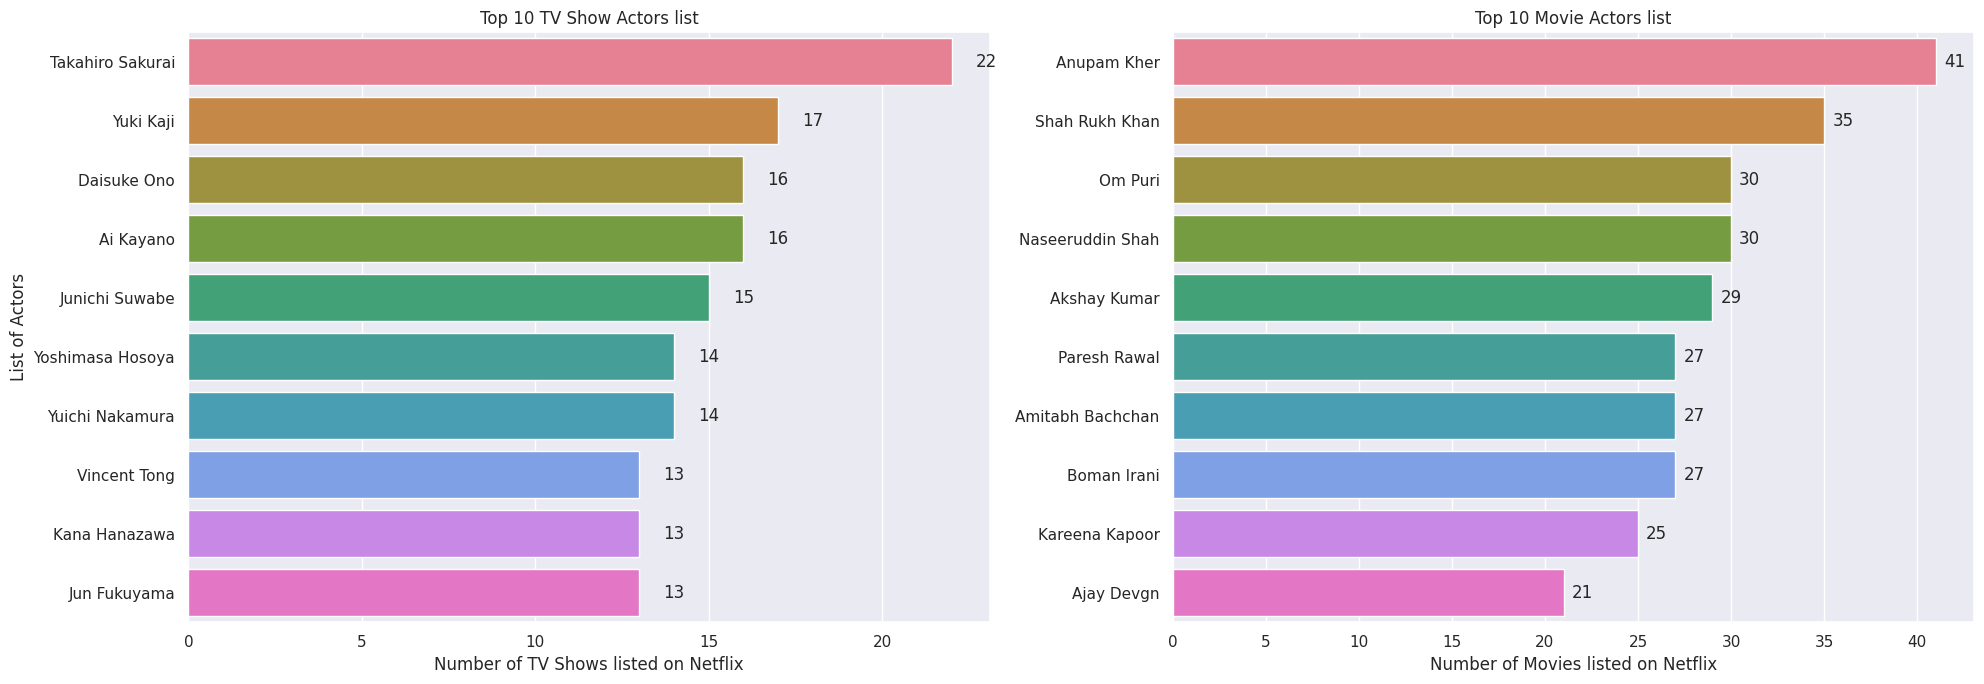

In [391]:
# visualization code
plt.figure(figsize=(20,7))
sns.set(style='darkgrid')
#plot for TV show actors
plt.subplot(1,2,1)
tv = sns.barplot(x=top_tvshow_actors.values, y=top_tvshow_actors.index, palette="husl")
plt.title('Top 10 TV Show Actors list')
plt.ylabel('List of Actors')
plt.xlabel('Number of TV Shows listed on Netflix')
# annotating bars
for p in tv.patches:
  tv.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# plot for Movie Actors
plt.subplot(1,2,2)
mo = sns.barplot(x=top_movie_actors.values, y=top_movie_actors.index, palette="husl")
plt.title('Top 10 Movie Actors list')
plt.xlabel('Number of Movies listed on Netflix')
# annotating bars
for p in mo.patches:
  mo.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Again we are using countplot for comparing as countplot is less complex and much more easier to understand.

##### 2. What is/are the insight(s) found from the chart?

We compared list of top 10 Actors for both TV Shows and Movies based on of how many they were part of.

Surprisingly, list of top 10 Actors for Movies contain list of all Indian origin Actors, while for TV Shows are all International Actors, with 'Anupam Kher' toping the list for Movies count of '41' and 'Takahiro Sakarai' for TV show category with a count of 22, which tells us about audience preferences.

Also, it is noteable that count for Movies for top 10 Actors is almost double of the count of TV Actors for TV shows.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

these insights can guide content acquisition, audience targeting, and marketing efforts, ultimately helping Netflix better cater to the diverse preferences of its global and regional audience and maintain a competitive edge in the streaming industry.

#### Chart - 5

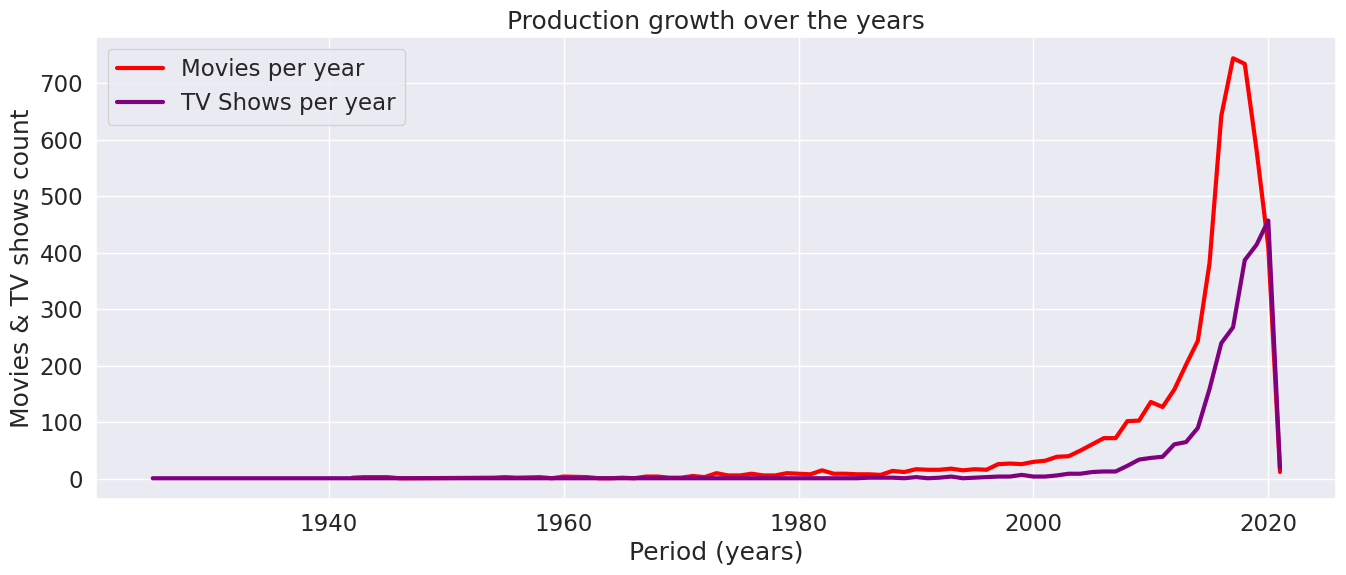

In [392]:
# let's find out in which years Movies and TV shows were released
mov_yearwise = movies['release_year'].value_counts().sort_index(ascending=False)
tv_yearwise = tv_shows['release_year'].value_counts().sort_index(ascending=False)

# visualization code
sns.set(font_scale=1.5)
#plot for Movie releases
mov_yearwise.plot(figsize=(16,6), linewidth=3, color='red', label='Movies per year', ms=3)
# plot for TV show releases
tv_yearwise.plot(figsize=(16,6), linewidth=3, color='purple', label='TV Shows per year', ms=3)

plt.xlabel('Period (years)')
plt.ylabel('Movies & TV shows count')
plt.title('Production growth over the years')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Lineplots or line charts are used to display data points over a continuous interval or time period, showing how a particular variable changes and are particularly effective for visualizing trends and patterns in data.

##### 2. What is/are the insight(s) found from the chart?

In this line plot we can see the trend of production growth of content over the period of years from even before 1940 till 2020 (based on content's release year).

It is clear from the chart that TV shows came way before Movies production started, and that growth was stagnant before 1980, after which it slowly started picking up pace and 'Movies' a little more than 'TV shows'.

Post 2000's saw a sudden surge in production and popularity for both content, but Movies were produced more in numbers clearly, Contnt peaked up around 2018-2020, witha count for movies at 700+ per year and for TV shows around 450 per year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are positive business impacts for sure, as analyzing historical growth trends can inform our content strategy, help us staying ahead of market dynamics, creating marketing campaigns or recommendations to engage viewers with content from those periods, potentially increasing viewership and retention etc.

#### Chart - 6

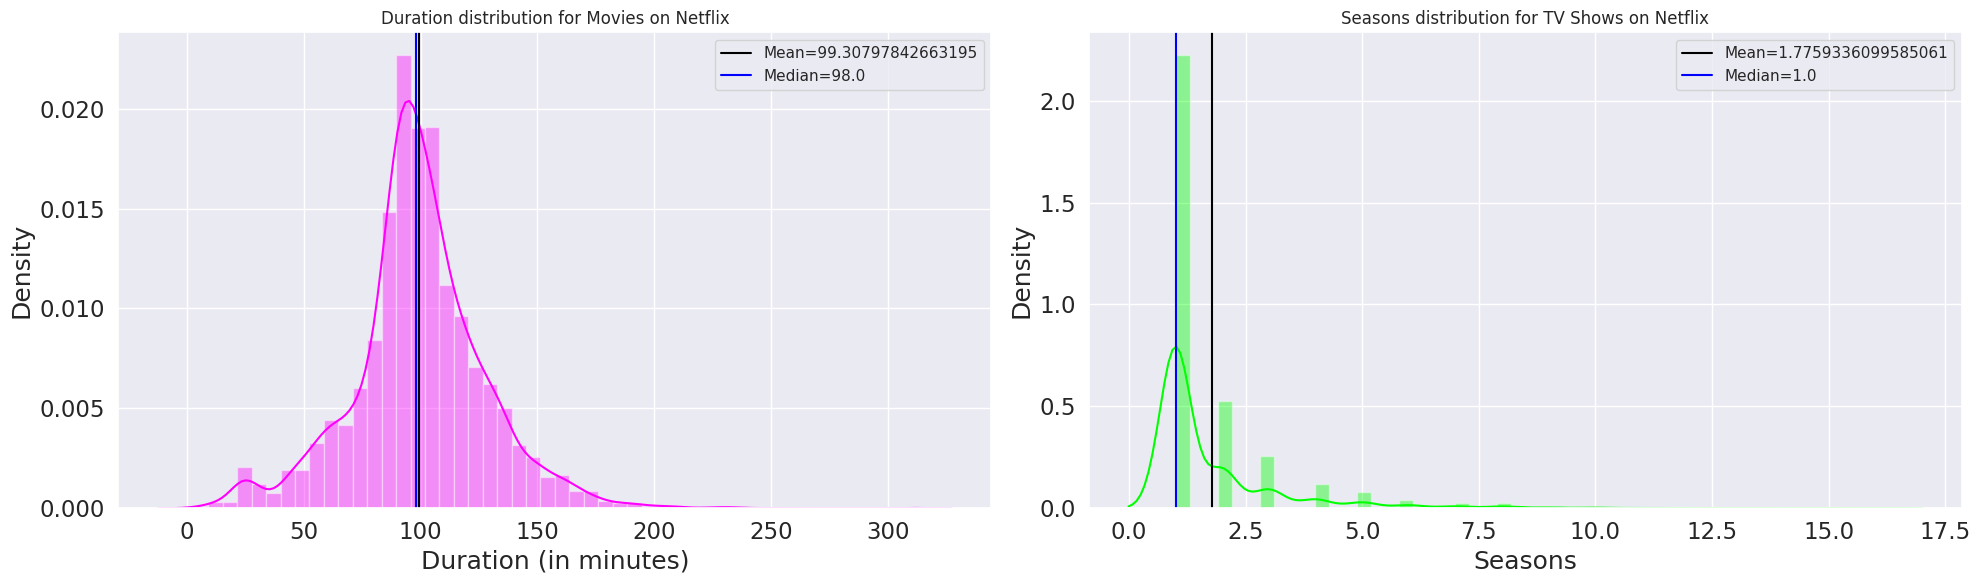

In [393]:
# Chart - 5 visualization code
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.set(style='darkgrid')
# let's plot a distplot for duration of movies
sns.distplot(movies.duration, color='magenta', ax=ax[0])
ax[0].set_xlabel('Duration (in minutes)')
ax[0].set_title('Duration distribution for Movies on Netflix')
# adding mean and median lines
mean_dur = movies.duration.mean()
ax[0].axvline(mean_dur, color='black', linestyle='-', label=f'Mean={mean_dur}')
med_dur = movies.duration.median()
ax[0].axvline(med_dur, color='blue', label=f'Median={med_dur}')

# plotting boxplot for seasons of TV Shows
sns.distplot(tv_shows.seasons, color='lime', ax=ax[1])
ax[1].set_xlabel('Seasons')
ax[1].set_title('Seasons distribution for TV Shows on Netflix')
# adding mean and median lines
mean_sea = tv_shows.seasons.mean()
ax[1].axvline(mean_sea, color='black', linestyle='-', label=f'Mean={mean_sea}')
med_sea = tv_shows.seasons.median()
ax[1].axvline(med_sea, color='blue', label=f'Median={med_sea}')

ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Distplots combine a histogram and a kernel density estimate to provide a comprehensive view of the data's distribution and are particularly useful for understanding the shape, central tendency, and spread of a dataset, making it easier to identify patterns, outliers, and potential deviations from normality.

##### 2. What is/are the insight(s) found from the chart?

From the charts we know,

Most movie duration averages around 95-100 minutes, While most TV shows have mostly 1 or 2 seasons at most, suggesting viwers often prefer moderate length movies and short series with concise storylines.

There are very few movies that have more than 200 minutes of duration and there are very few TV shows with more than 10 seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 These insights are valuable for tailoring content offerings to audience preferences, optimizing content production, and ensuring a diverse content library that caters to a wide range of viewer needs and preferences.

#### Chart - 7

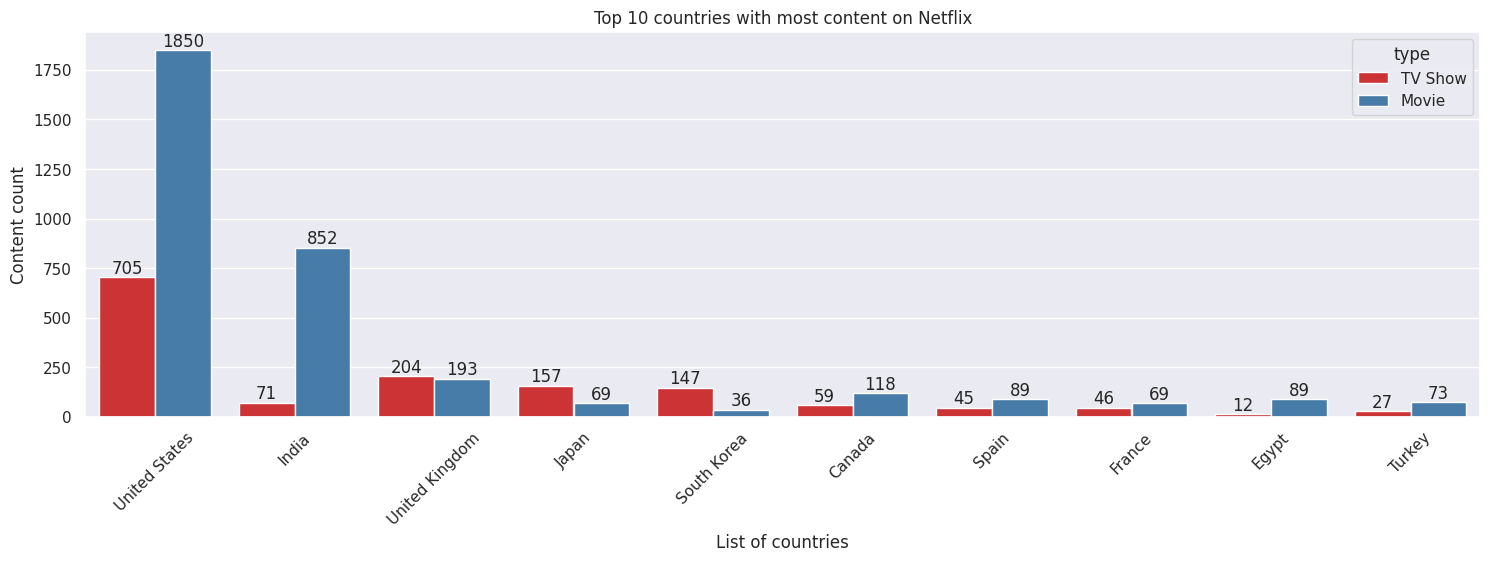

In [394]:
# Chart - 6 visualization code
plt.figure(figsize=(18,5))
sns.set(style='darkgrid')
# let's find top 10 countries with most content on Netflix
top_countries = df[df['country'] != 'N/A']
ax = sns. countplot(x=top_countries['country'], order=top_countries['country'].value_counts().index[:10], hue=df['type'], palette="Set1")
# adding annotations
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('List of countries')
plt.ylabel('Content count')
plt.title('Top 10 countries with most content on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

We are using countplot, as we know it is less complex and easier to understand.

##### 2. What is/are the insight(s) found from the chart?

The chart above shows the top 10 countries that has listed most content on Netflix for categories TV shows and Movies. Very clear from the chart that USA is the top and has significantly way higher count of content than other 9 countries.

Moreover, total movies listed in USA are more than even sum of count of movies listed in all other 9 countries at 1850, closest is India at 2nd with 852 count in movies but rest don't even cross the 200 mark.

Also TV show count in US is significantly higher than other countries at 705, but in comparison to Movies (wich is about 2.6 times more) listed is way less, while for India it is a mere 71 for TV shows (12 times less). Also count for other countries remains below 250 for both content types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights highlight the dominance of the USA in Netflix content, particularly in movies. These insights inform strategies for content acquisition, localization, and marketing, helping cater to regional preferences, improving user engagement, and gain a competitive edge in a global market making a positive impact in business.

#### Chart - 8

In [395]:
# Netflix have both original shows(their own) and added shows(from other sources)
movies['movie_org'] = np.where(movies['release_year'] == movies['year_added'], 'Movie Originals', 'Others')         # for Movies
tv_shows['shows_org'] = np.where(tv_shows['release_year'] == tv_shows['year_added'], 'TV Show\nOriginals', 'Others')   # for TV shows
# calculating the count for movies and tv shows
mov_count = movies['movie_org'].value_counts()
tv_count = tv_shows['shows_org'].value_counts()

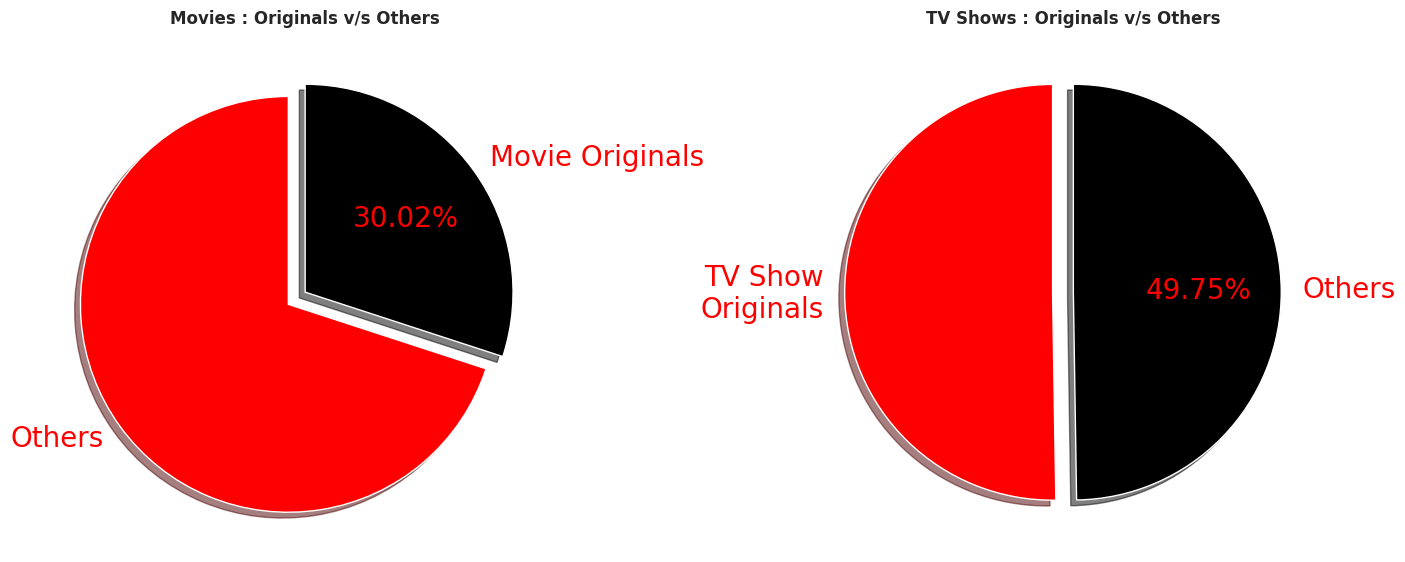

In [396]:
# visualization code
fig, ax = plt.subplots(1,2,figsize=(14,6), facecolor="white")
fig.patch.set_facecolor("white")
explode = (0.1,0)
colors = ['red','black']

# subplot for Movies
ax[0].pie(mov_count, explode=explode, autopct='%.2f%%', labels=mov_count.index, shadow=True, startangle=90,
          textprops={'color':"red", 'fontsize':20}, colors=colors)
ax[0].set_title('Movies : Originals v/s Others', fontweight='bold')

#subplot for TV shows
ax[1].pie(tv_count, explode=explode, autopct='%.2f%%', labels=tv_count.index, shadow=True, startangle=90,
          textprops={'color':"red", 'fontsize':20}, colors=colors)
ax[1].set_title('TV Shows : Originals v/s Others', fontweight='bold')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We have used Pie chart that too with exploding technique to emphasize and highlight specific segments or categories within the chart. Exploding Pie chart involves separating one or more slices from the center of the pie chart to make them stand out visually.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the distribution between content added on Netflix based on how they were added on the platform, while 'Originals' refers to Netflix's own productions, 'Others' contain content added later on or from other sources, for both TV shows and Movies categories.

We can see that 30.2% of the Movies on Netflix are 'Originals', while for TV shows 'originals' account for 50.25% on the platform.

#### Chart - 9

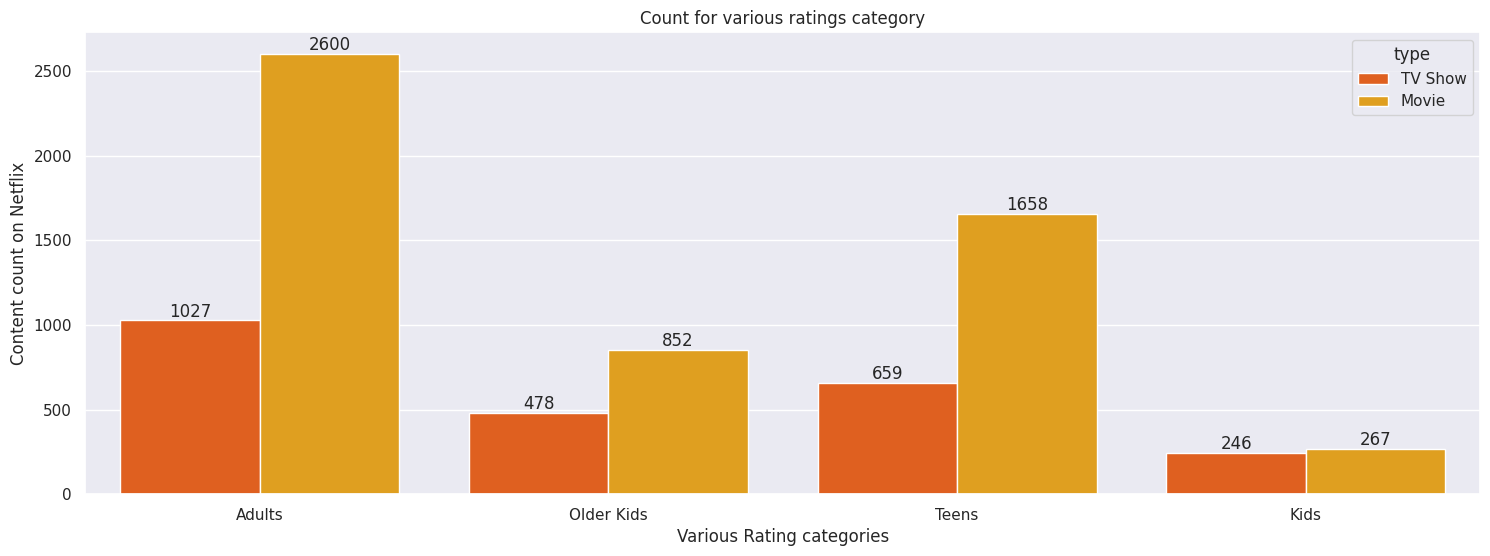

In [397]:
# Chart - 8 visualization code
plt.figure(figsize=(18,6))
# let's plot a chart for catrgory 'ratings'
ax = sns.countplot(data=df, x='ratings_cat', hue='type', palette='autumn')
plt.xlabel('Various Rating categories')
plt.ylabel('Content count on Netflix')
plt.title('Count for various ratings category')
# annotating the bars
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() /2., p.get_height()), ha='center', va='bottom')

plt.show()

##### 1. What is/are the insight(s) found from the chart?

We used countplot to get the count of content listed on Netflix based on age group ratings for content type 'Movies' and 'TV Shows'.

Age groups are distinguished by 'Adults', 'Teens', 'Older Kids' and 'Kids'. "Adult" rated content has the highest count on Netflix at 1027 for TV show and 2600 for Movies, Teens at second and "Kids" rated content has lowest count indicating age group 'Adults' are the most targeted viewers and 'Kids' the least.

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help Netflix make data-driven decisions related to content strategy, audience targeting, and content promotion. By understanding the age group preferences of its viewers, Netflix can optimize its content offerings, enhance viewer engagement, and maintain a competitive edge in the streaming industry.

#### Chart - 10

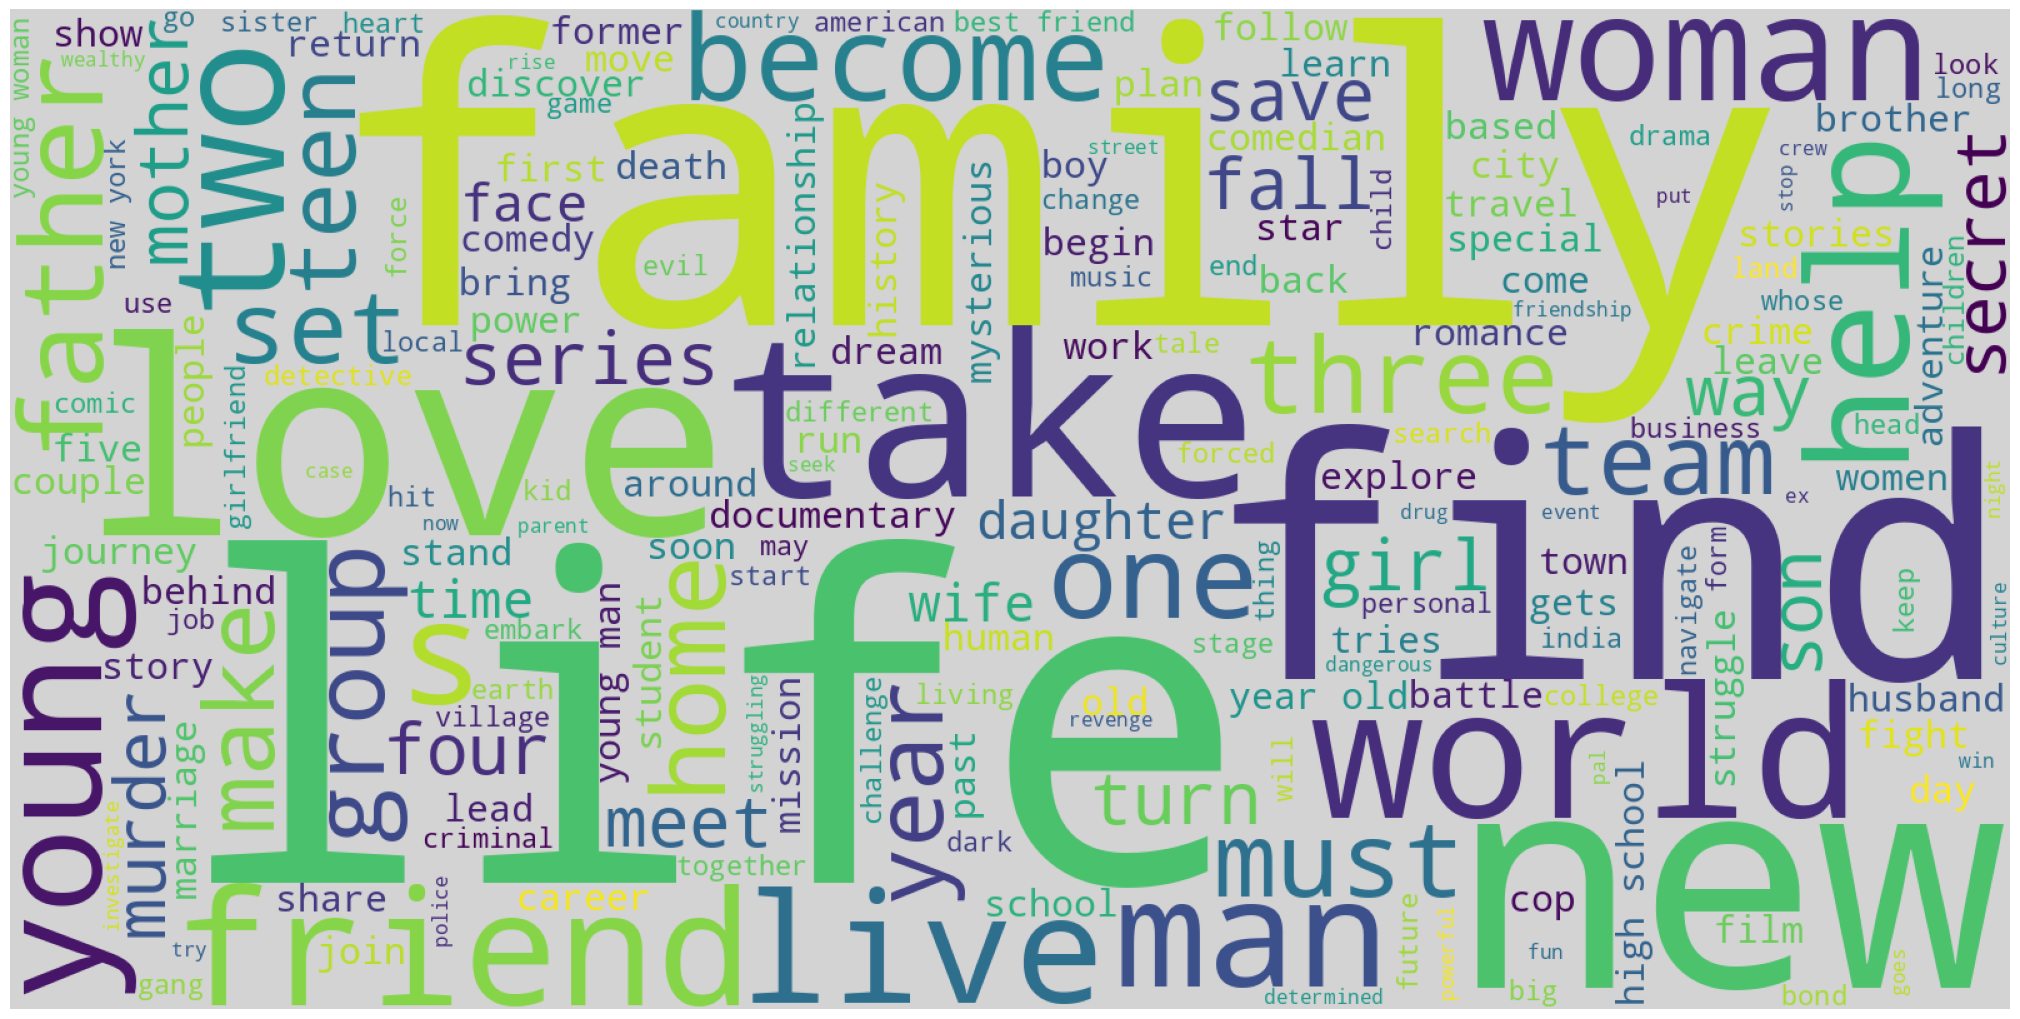

In [398]:
# Let's build a wordcloud from column 'descriptions'
from wordcloud import WordCloud, STOPWORDS
words=''
stopwords=set(STOPWORDS)

for value in df.description.values:
  value = str(value)
  tokens = value.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  words += " ".join(tokens)+" "

# plotting WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color='lightgray', stopwords=stopwords, min_font_size=10).generate(words)

plt.figure(figsize=(50,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

We used word cloud, this visually represents text data, with words displayed in varying sizes based on their frequency or importance within the text, bigger the word, more their frequency and more importance they have.

##### 2. What is/are the insight(s) found from the chart?

Word clouds allows us to emphasize specific terms or concepts by making them larger and more visible drawing attention to important elements within the text. From the wordcloud it is clear that, "life", "find" and "family" are the most frequent words in dataset, after that come words like "world", "love", "new", "take", "friend", "two" and so on.

#### Chart - 11 - Correlation Heatmap

In [399]:
# Let's find relation between countries and rating categories of their content on Netflix
df['count'] = 1    # sets values to 1 in column for no repetition
data = df.groupby('country')['count'].sum().sort_values(ascending=False).reset_index()[:10]   # groupby based on counts (top 10)
data = data[data['country'] != 'N/A']    # filter to exclude 'N/A'
data=data['country']
data   # contains top 10 countries with highest counts

0     United States
1             India
3    United Kingdom
4             Japan
5       South Korea
6            Canada
7             Spain
8            France
9             Egypt
Name: country, dtype: string

In [400]:
# let's create a cross-tabulation of country and ratings categories
heatmap_df = df[df['country'] != 'N/A']    # filtering 'N/A' values
heatmap_df = heatmap_df.loc[heatmap_df['country'].isin(data)]   # filter to include countries in top 10
heatmap_df = pd.crosstab(heatmap_df['country'], heatmap_df['ratings_cat'], normalize="index").T
heatmap_df

country,Canada,Egypt,France,India,Japan,South Korea,Spain,United Kingdom,United States
ratings_cat,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.367257,0.469945,0.835821,0.513854,0.502544
Older Kids,0.225989,0.039604,0.060870,0.160347,0.269912,0.120219,0.044776,0.204030,0.187476
Teens,0.146893,0.683168,0.165217,0.567714,0.353982,0.382514,0.097015,0.188917,0.236791
Kids,0.180791,0.000000,0.095652,0.016251,0.008850,0.027322,0.022388,0.093199,0.073190


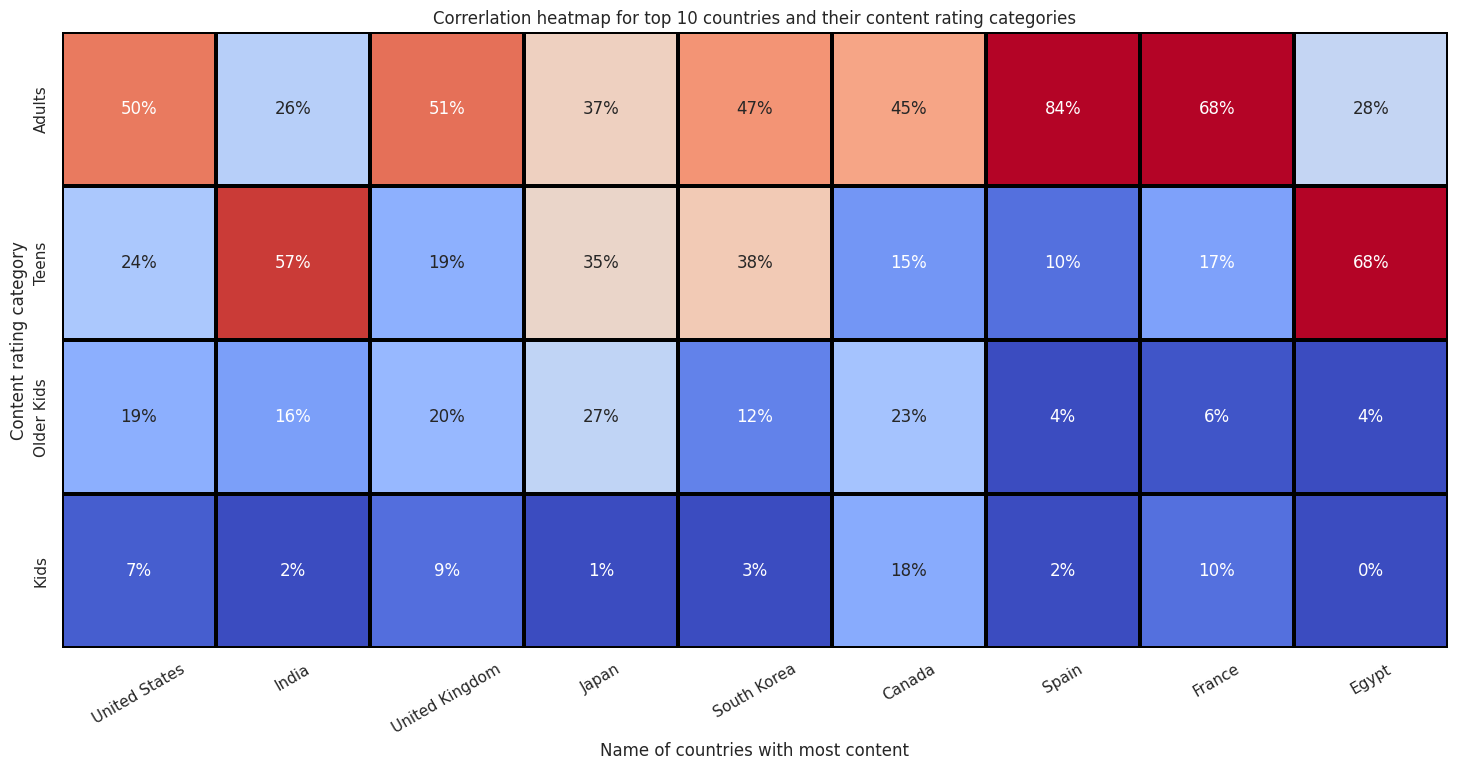

In [401]:
# plotting the heatmap
fig, ax = plt.subplots(1,1,figsize=(18,8))
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
sns.heatmap(heatmap_df.loc[age_order, data], cmap='coolwarm', annot=True, linecolor='black', linewidths=1.5, square=True,
            cbar=False, fmt='1.0%', vmax=0.6, vmin=0.05, ax=ax, annot_kws={'fontsize':12})
plt.xlabel('Name of countries with most content')
plt.xticks(rotation=30)
plt.ylabel('Content rating category')
plt.title('Correrlation heatmap for top 10 countries and their content rating categories')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation Heatmap display the correlations between variables in a dataset as a color-coded matrix. Each cell in the matrix represents the correlation coefficient between two variables, with colors indicating the strength and direction of the correlation

##### 2. What is/are the insight(s) found from the chart?

Our correlation Heatmap plots 'Top 10 countries' and 'Content rating category based on age groups' as the variables to check for correlation.

According to our color codes, the brighter the color, stronger the correlation and cooler the color, lesser the correlation. We even have percentage representing the correlation strength.

Spain has the strongest correlation of 84% with "Adults" age group, meaning 84% of the content produced in Spain falls in 'Adult' rated category, while the lowest correlation is between 'Egypt' and 'Kids' rating of 0%, meaning there is no "kids" content made in Egypt.

Highest "Teens" rated content comes from first 'Egypt' and 'India' at second.Also, highest "Older Kids" rated content is made in 'Japan' and highest "kids" rated content is made in 'Canada'.

Similarly we can check for all listed countries and rated content.

#### Chart - 15 - Pair Plot

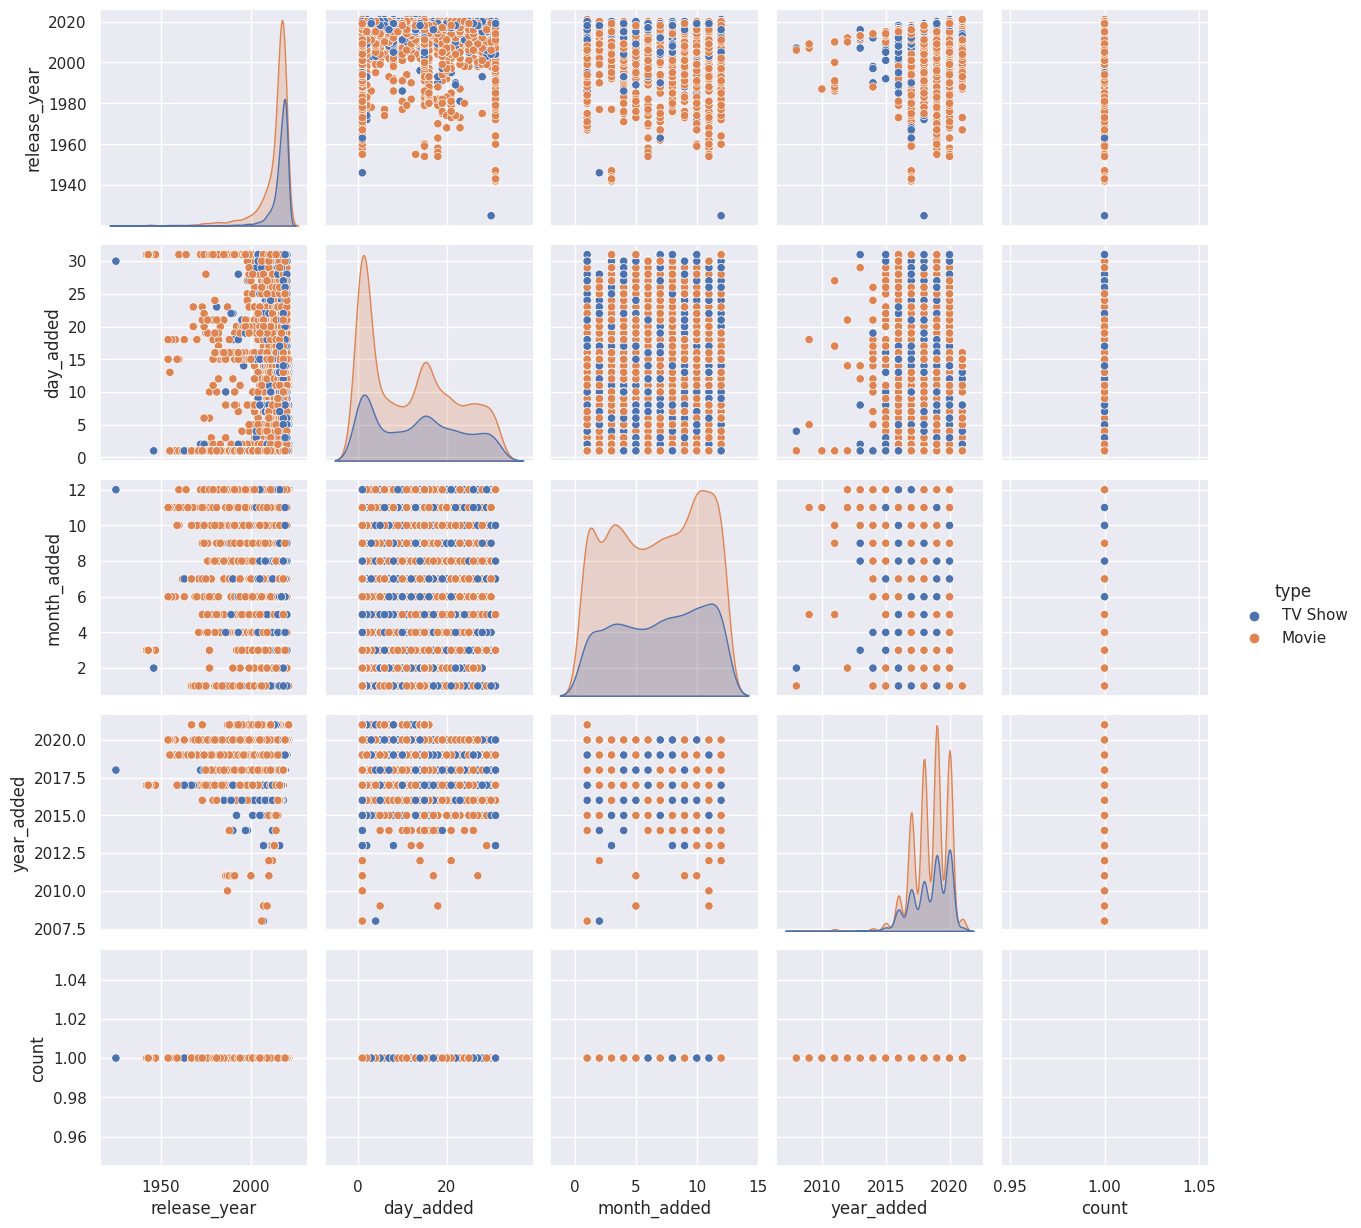

In [402]:
# Pair Plot visualization code
sns.pairplot(data=df, hue='type')
plt.show()

##### 1. Why did you pick the specific chart?

Pairplots are a powerful tool for exploratory data analysis (EDA) and provide a visual way to uncover relationships, patterns, and potential issues within a dataset. They are particularly useful when working with multiple variables and can guide further analysis, modeling, and data-driven decision-making.

##### 2. What is/are the insight(s) found from the chart?

The pairplot plots the data between 'release_year', 'day_added', 'month_added' and 'year_added' and shows the data distribution for 'TV show' and 'Movie' types.

Points clustering in a linear pattern suggest a strong correlation, while scattered points indicate weaker or no correlation, while points forming tight linear patterns between certain pairs of variables, indicate multicollinearity.
Unusual data points that don't follow the general trend of the data can be identified as outliers.

# ***5. Hypothesis Testing***

Hypothesis testing is a statistical method used to make inferences about population parameters based on a sample of data. It involves formulating a null hypothesis (H0) and an alternative hypothesis (H1), collecting data, and using statistical techniques to determine whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.

### Hypothetical Statement

1. Null Hypothesis (H0): "There is no significant difference in ratings of content produced in US and content produced in India."
2. Alternative Hypothesis (H1): "There is a significant difference in ratings of content produced in US and content produced in India."

#### Perform an appropriate statistical test.

In [403]:
# Performing Statistical Test to obtain P-Value:
# first we'll create a copy of our dataframe
hyp_df = df.copy()
# mapping needed data for hypothesis test
data = {'country':['US', 'India', 'US', 'India', 'US', 'India', 'US', 'India', 'US', 'India', 'US', 'India', 'US', 'India'],
        'rating':['TV-MA','R','PG-13','TV-14','TV-PG','NR','TV-G','TV-Y','TV-Y7','PG','G','NC-17','TV-Y7-FV','UR']}
hyp_df = pd.DataFrame(data)
# let's ensure that 'rating' column is numeric
hyp_df['rating'] = pd.to_numeric(hyp_df['rating'], errors='coerce')

# extracting ratings for content roduced in US
us_rat = hyp_df[hyp_df['country'] == 'US']['rating']

# extracting ratings for content roduced in India
ind_rat = hyp_df[hyp_df['country'] == 'India']['rating']

# let's perform a t-test to compare the means of two groups
t_statistic, p_value = stats.ttest_ind(us_rat, ind_rat)
# setting the significance level
alpha = 0.05

# checking if p-value is less than significance level
print('Result of Hypothesis testing :\n')

if p_value < alpha:
  print("Null Hypothesis Rejected: there is a significant difference in ratings between content produced in US and India.")
else:
  print("Null Hypothesis Passed: there is no significant difference in ratings between content produced in US and India.")

Result of Hypothesis testing :

Null Hypothesis Passed: there is no significant difference in ratings between content produced in US and India.


##### Which statistical test have you done to obtain P-Value?

**We performed a " two-sample t-test " to obtain the p-value.**

##### Why did you choose the specific statistical test?

The choice of this statistical test 't-test' is appropriate as we are comparing the means of two independent groups (i.e. content produced in US and India) to determine if there is any significant defference in ratings.  The t-test is commonly used for such comparisons when the data is approximately normally distributed and meets the assumptions of the test. therefore, In this scenario t-test allowed to assess whether the observed differences in ratings between the two groups are statistically significant or if they could have occurred due to random chance.

# ***6. Feature Engineering & Data Pre-processing***

Feature engineering is the process of creating new features or modifying existing features in our dataset to improve the performance of machine learning models. It involves selecting, transforming, or creating variables etc. that are relevant and informative for the specific task we are trying to solve.

## Categorical Encoding

In [404]:
# Encoding categorical column 'type'
category_col = ['type']
df = pd.get_dummies(df, columns = category_col, prefix = category_col)
df.drop(['count'], axis=1, inplace=True)
df.head(2).T

show_id,s1,s2
title,3%,7:19
cast,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
country,Brazil,Mexico
release_year,2020,2016
rating,TV-MA,TV-MA
duration,4 Seasons,93 min
listed_in,"International TV Shows, TV Dramas, TV Sci-Fi &...","Dramas, International Movies"
description,In a future where the elite inhabit an island ...,After a devastating earthquake hits Mexico Cit...
day_added,14,23
month_added,8,12


#### What all categorical encoding techniques have you used & why did you use those techniques?

We used 'One-Hot' Encoding technique as, One-hot encoding is used to convert categorical data into binary (0 or 1) format, where each category is transformed into a separate binary column which is perfect for our 'type' data as it contains only two categories: 'Movie' and 'TV Show', One-hot encoding is suitable for columns with small number of categories.

## Feature Selection

In [405]:
# features selection
text_features = ['description', 'cast',  'listed_in']

# forming a seperate dataframe
text_feature_df = df[text_features].astype(str)
text_feature_df = text_feature_df.reset_index(drop=True)
text_feature_df.head(2)

,description,cast,listed_in
0,In a future where the elite inhabit an island ...,"João Miguel, Bianca Comparato, Michel Gomes, R...","International TV Shows, TV Dramas, TV Sci-Fi &..."
1,After a devastating earthquake hits Mexico Cit...,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International Movies"


## Textual Data Preprocessing

Textual preprocessing refers to the various steps and techniques applied to raw text data to make it suitable for analysis or machine learning tasks. These preprocessing steps help in cleaning, organizing, and transforming text data so that it can be used effectively in natural language processing (NLP) or text mining applications.

#### 1. Expand Contraction

Expanding contractions in text data refers to converting shortened or contracted words into their full, grammatically correct forms. Contractions are generally combinations of two words where one or more letters are omitted, typically for reasons of informal writing or speech (Eg; I'm, can't etc.).

In [406]:
# combining text based features in single column
text_feature_df['clustered_text'] = text_feature_df['description']+' '+text_feature_df['cast']+' '+text_feature_df['listed_in']
featured_data = text_feature_df[['clustered_text']]
featured_data.head()

,clustered_text
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...


#### 2. Lower Casing

In [407]:
# Lower Casing
featured_data['clustered_text'] = featured_data['clustered_text'].str.lower()
featured_data.head()

,clustered_text
0,in a future where the elite inhabit an island ...
1,after a devastating earthquake hits mexico cit...
2,"when an army recruit is found dead, his fellow..."
3,"in a postapocalyptic world, rag-doll robots hi..."
4,a brilliant group of students become card-coun...


#### 3. Removing Punctuations

In [408]:
# Remove Punctuations
def remove_punctuation(text):
  import string
  translator = str. maketrans('','', string.punctuation)    # function to create translation table, specifies how characters should be mapped
  return text.translate(translator)

featured_data['clustered_text'] = featured_data['clustered_text'].apply(remove_punctuation)
featured_data.head()

,clustered_text
0,in a future where the elite inhabit an island ...
1,after a devastating earthquake hits mexico cit...
2,when an army recruit is found dead his fellow ...
3,in a postapocalyptic world ragdoll robots hide...
4,a brilliant group of students become cardcount...


#### 4. Removing Stopwords & Removing White spaces

Stopwords are common words that are often removed from text data during (NLP) tasks because they are considered to be of little value in terms of conveying meaningful information(Eg: a, an, and, but, in, by, you, etc.).

In [409]:
# Remove Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text)

featured_data['clustered_text'] = featured_data['clustered_text'].apply(stopwords)
featured_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clustered_text
0,future elite inhabit island paradise far crowd...
1,devastating earthquake hits mexico city trappe...
2,army recruit found dead fellow soldiers forced...
3,postapocalyptic world ragdoll robots hide fear...
4,brilliant group students become cardcounting e...


In [410]:
# Remove extra White spaces (if any)
featured_data['clustered_text'] = featured_data['clustered_text'].apply(lambda x: ' '.join(x.split()))
featured_data.head()

,clustered_text
0,future elite inhabit island paradise far crowd...
1,devastating earthquake hits mexico city trappe...
2,army recruit found dead fellow soldiers forced...
3,postapocalyptic world ragdoll robots hide fear...
4,brilliant group students become cardcounting e...


#### 5. Rephrase Text and Tokenization

In [411]:
# Rephrase Text
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()      # initailizing

def rephrase_text(text):
  words = word_tokenize(text)    # tokenize text into words
  lemmatized_words = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in words]      # lemmatizing each word to base form
  rephrased_text = ' '.join(lemmatized_words)               # join the lemmatized words back into text
  return rephrased_text

featured_data['clustered_text'] = featured_data['clustered_text'].apply(rephrase_text)
featured_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clustered_text
0,future elite inhabit island paradise far crowd...
1,devastate earthquake hit mexico city trap surv...
2,army recruit find dead fellow soldier force co...
3,postapocalyptic world ragdoll robots hide fear...
4,brilliant group students become cardcounting e...


#### 6. Text Normalization

We have already done text normalization in the part of code used above:

" **lemmatized_words = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in words]** "


##### Which text normalization technique have you used and why?

Lemmatization reduces words to their base or dictionary form, which is called a "lemma." The purpose of lemmatization is to standardize words so that different inflected forms or conjugations of a word are reduced to a common base form (Eg: words like running, ran, runs will return to base form 'run').

#### 7. Text Vectorization

In [412]:
# creating TF=IDF vectorizer
text_data = featured_data['clustered_text']
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# fitting and transforming the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(featured_data['clustered_text'])

tfidf_array = tfidf_matrix.toarray()
feature_terms = tfidf_vectorizer.get_feature_names_out()

# converting matrix into dataframe
vectorized_df = pd.DataFrame(data=tfidf_array, columns=feature_terms)

vectorized_df.head(2)

,10,10yearold,11yearold,12,13,15,1920s,1950s,1960s,1970s,...,zoey,zombie,zone,zoë,zutshi,álex,álvarez,álvaro,ángel,ángela
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [413]:
vectorized_df.shape

(7787, 5000)

##### Which text vectorization technique have you used and why?

We used "TF-IDF" (Term Frequency-Inverse Document Frequency ) Vectorization technique which is used for text data preprocessing that helps representing text documents as numerical vectors. It is suitable for machine learning, reducing dimensionality, capturing important features, and enabling various text analysis tasks.

What we did above will result in formation of 'TF-IDF matrix' :

This 'tfidf_matrix' will contain the TF-IDF representations of the 'description' text data. Each row of the matrix corresponding to a description, and each column corresponding to a unique word in the text data's vocabulary. The values in the matrix represent the TF-IDF scores, which quantify the importance of each word in each description relative to the entire corpus of descriptions.


## Feature Scaling

#### Scaling the selected feature

In [414]:
''' We will be proceeding further with 'vectorized_df' as our selected feature for further data processing'''

# Initializing StandardScaler for scaling the data
scaler = StandardScaler()

# fitting and transforming the combined data
clustered_data_df = scaler.fit_transform(vectorized_df)

##### Which method have you used to scale you data and why?

We have used StandardScalar to scale our data. It scale features to have a mean of 0 and a standard deviation of 1 which benefits machine learning algorithms by ensuring that all features contribute equally to model training. Scaling prevents features with larger scales from dominating the learning process and makes models more stable and convergent.

### Dimensionality reduction

Dimensionality reduction techniques are used to reduce the number of features (dimensions) in a dataset while preserving relevant information, resulting in less complexity, better performance and avoidance of overfitting.

In [415]:
# Initializing Principal Component Analysis (without specifying number of components)
pca = PCA(random_state=42)

# fitting PCA on data
pca.fit(vectorized_df)

PCA(random_state=42)

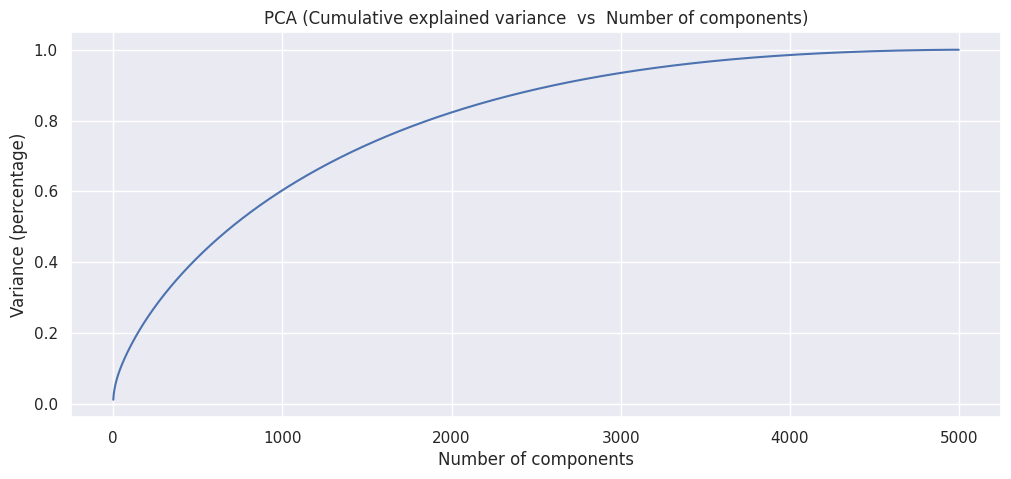

In [416]:
# let's plot a graph to find optimal number of components
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA (Cumulative explained variance  vs  Number of components)')
plt.xlabel('Number of components')
plt.ylabel('Variance (percentage)')
plt.show()

From the graph it is evident that we can achieve 100% variance with 5000 number of components but still it is a little higher. Also, more than 90% variance can be achieved with only '3000' number of components which is still good enough, hence we will select '3000' as the value for 'n_components'.

In [417]:
# Initializing PCA
pca = PCA(n_components = 3000)

# fitting on reduced data
cluster_df = pca.fit_transform(vectorized_df)          # final data for clustering process

We used Principal Component Analysis technique for dimensionality reduction process. PCA is a versatile and can lead to more efficient, interpretable and generalizable models, particularly when dealing with high-dimensional data like ours.

# ***7. ML Model Implementation***

## ML Model - **K-Means Clustering**

Key aspect of K-Means clustering include the choice of the number of clusters (K) for which various techniques, such as the elbow method or silhouette analysis can be used to determine the optimal value. Additionally, K-Means is a hard clustering algorithm, meaning each data point is assigned to one and only one cluster. The main objective of K-Means is to group data points into clusters so that data points within the same cluster are more similar to each other than to those in other clusters.

In [418]:
# Initializing KMeans, but first let's find out an optimal value for n_clusters:
silhouette_scores = []    # empty list to store silhouette score
# defining a range of possible values for n_clusters
range_n_clusters = list(range(2,6))

for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = kmeans.fit_predict(cluster_df)
  silhouette_avg = silhouette_score(cluster_df, cluster_labels)
  silhouette_scores.append(silhouette_avg)

# finding optimal n_cluster through silhouette score
n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters : {n_clusters}')

Optimal number of clusters : 4


In [419]:
# Model Implementation
kmeans = KMeans(n_clusters = n_clusters, random_state=42, init='k-means++')

# model fit
kmeans.fit(cluster_df)

# predict on the model
kmeans_cluster = kmeans.predict(cluster_df)

In [420]:
# evaluating cluster quality through silhouette score
score = silhouette_score(cluster_df, kmeans.fit_predict(cluster_df))
print("Silhouette score for K-Means is {}".format(score))

Silhouette score for K-Means is 0.012048254875020887


A silhouette score for K-Means clustering indicates the quality of clustering results. A score close to 1 suggests that the data points within the clusters are well-separated and belong to the correct cluster, score close to 0 suggests overlapping clusters or that data points are on or very close to the decision boundary between two neighboring clusters and a score close to -1 suggests that the data points may have been assigned to the wrong clusters.

In [421]:
# adding column for clusters in 'df'
df['cluster_kmeans'] = kmeans_cluster
df.head()

,title,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,ratings_cat,type_Movie,type_TV Show,cluster_kmeans
show_id,,,,,,,,,,,,,,,
s1,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Adults,0,1,1
s2,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Adults,1,0,0
s3,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,Adults,1,0,0
s4,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,Teens,1,0,0
s5,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,Teens,1,0,0


#### Cluster Visualization

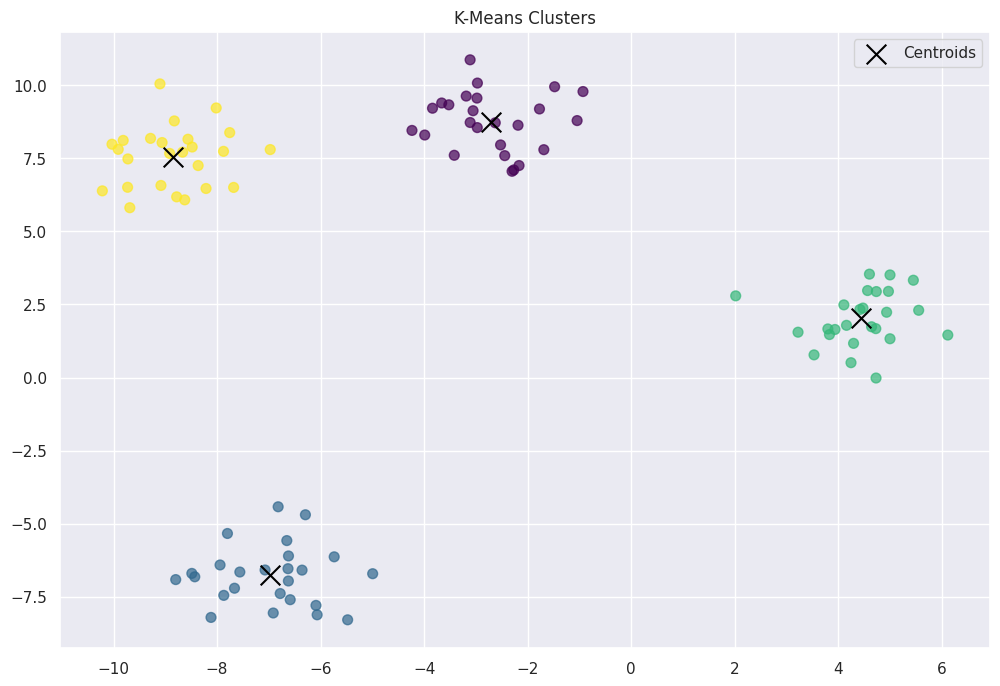

In [422]:
from sklearn.datasets import make_blobs

n_clusters = n_clusters
cluster_df, _ = make_blobs(centers = n_clusters, random_state=42)

# applying K-Means
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(cluster_df)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# plotting the chart
plt.figure(figsize=(12,8))
# plotting data points
plt.scatter(cluster_df[:, 0], cluster_df[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
# plotting cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=200, label='Centroids')

plt.title('K-Means Clusters')
plt.legend()
plt.show()

##  ML Model - **Hierarchical Clustering / Dendrogram**

In a Dendrogram,

The branches represents clusters of datapoints, the closer the branches, similar the datapoints in those clusters.

The height of the branch represents distance between the two clusters that are merged to form that branch, higher the branch, more different the data points in the two clusters are.

Also, the height at which the dendrogram is cut determine the number of clusters in data, Moreover the colors are simply used to visually distinguish between different clusters.

In [423]:
# calculating linkage matrix
linkage_matrix = linkage(cluster_df, method = 'ward')

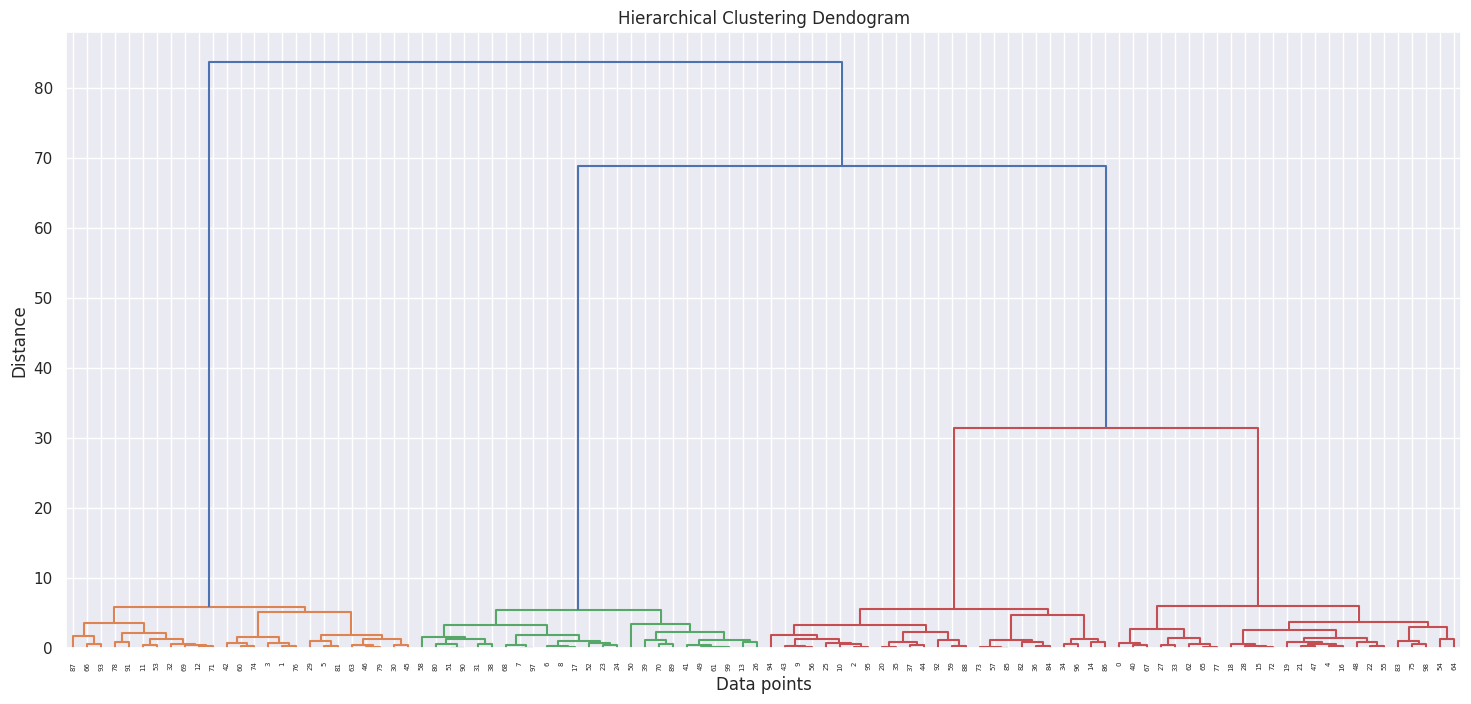

In [424]:
# Creating a Dendrogram
plt.figure(figsize=(18,8))

dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

**According to the Dendrogram, the optimal number of clusters appear to be '3' or '4'.**

We can further investigate this with the Elbow method.

### Elbow Method

In [425]:
wcss = []    # Within Cluster Sum of Squares
# let's define a range for possible clusters
k_range = range(2,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(cluster_df)
  wcss.append(kmeans.inertia_)


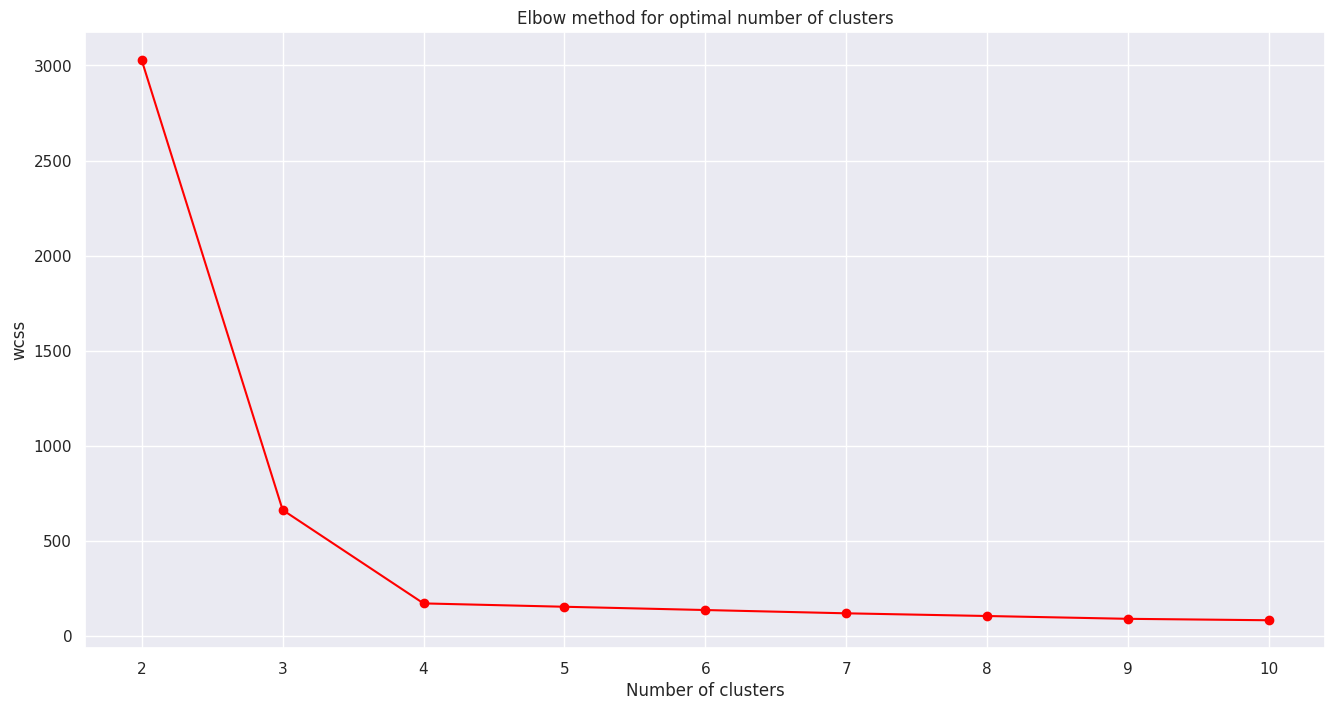

In [426]:
# plotting on graph
plt.figure(figsize=(16,8))
plt.plot(k_range, wcss, color='red', marker='o', linestyle='-')
plt.title('Elbow method for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.grid(True)
plt.show()

Again, it appears that optimal number of clusters are 3 or 4 as:
1. At cluster '3' : The sharp drop suggests that introducing a third cluster captures significant variation in our data.
2. At cluster '4' : The drop suggests that we continue to capture more variance suggesting we have even finer grained distinctions within the initial three clusters.

A 3-cluster provides a reasonable balance between simplicity and capturing distinct content groups while, the 4-cluster goes into more detail.

# **Recommendation System using Clustering**

In [427]:
''' let's build a recommendation system that recommends top similar content to watch '''
from sklearn.metrics.pairwise import cosine_similarity
# let's initialize a loop
while True:
  # using 'title' as input
  selected_title = input("Enter the title of the content for which you want recommendations : ")

  # first we need to check if 'title' exists in dataframe
  if selected_title in df['title'].values:
    selected_cluster = df[df['title'] == selected_title]['cluster_kmeans'].values[0]    # gets cluster label for selected title
    titles_in_same_cluster = df[df['cluster_kmeans'] == selected_cluster]               # filtering titles in same cluster
    # vectorizing 'description', 'cast', and 'listed_in'
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(titles_in_same_cluster['description']+' '+titles_in_same_cluster['cast']+' '+titles_in_same_cluster['listed_in'])
    # calculation of cosine similarity with selected title
    tfidf_vectorized_selected_title = tfidf_vectorizer.transform([titles_in_same_cluster[titles_in_same_cluster['title'] == selected_title]['description'].values[0]+' '+
                                                                               titles_in_same_cluster[titles_in_same_cluster['title'] == selected_title]['cast'].values[0]+' '+
                                                                               titles_in_same_cluster[titles_in_same_cluster['title'] == selected_title]['listed_in'].values[0]])
    cosine_similarity_scores = cosine_similarity(tfidf_matrix, tfidf_vectorized_selected_title)
    # returning top recommendations
    N = 5
    selected_title_index = titles_in_same_cluster[titles_in_same_cluster['title'] == selected_title].index[0]
    top_recommendations_indices = np.argsort(cosine_similarity_scores[:, 0])[::-1][1:N + 1]
    top_recommendations = titles_in_same_cluster.iloc[top_recommendations_indices]

    print(f"Top {N} recommendations for '{selected_title}' :\n")
    print(top_recommendations[['title']])
    break   # exiting loop if recommendations are found

  else:
    print(f"'{selected_title}' not found in dataset. Please enter a valid title.\n")

Enter the title of the content for which you want recommendations : the witch
'the witch' not found in dataset. Please enter a valid title.

Enter the title of the content for which you want recommendations : The Witcher
Top 5 recommendations for 'The Witcher' :

                                           title
show_id                                         
s7008    The Witcher: A Look Inside the Episodes
s5216                              Ripper Street
s7474                                 Wanderlust
s6277                          The Day Will Come
s6830                        The Road to Calvary


# **Conclusion**

In our project, we embarked on a comprehensive analysis of a vast dataset of content available on Netflix as of 2019. The data, sourced from Flixable, unveiled significant trends within the Netflix content like, how majority of content on Netflix is Movie based, how Netflix's popularity has leaped after 2015, finding top actors, favourite genres people like, average movies lasting 90-100 minutes, viewers preferring content to be binge watched, how US has most amount of content on the platform and much more.

The journey started with exploring our dataset, then went on to data analysis, data wrangling, data visualization. Further by employing advanced data preprocessing and feature engineering, we harnessed machine learning techniques, including K-Means clustering to uncover hidden patterns and grouping content into clusters. This allowed us to develop a recommendation system, which is based on the input of a content title, providing tailored suggestions for similar content to watch.

The project not only delivers valuable insights into content distribution and viewer preferences but also equips Netflix with actionable recommendations to adapt and cater to the ever-evolving demands of its subscribers. By exploring the dynamic landscape of the world's leading streaming service, we have paved the way for informed strategic decisions in a rapidly evolving digital entertainment industry.

Applications of our project in the industry:
1. Content curation and Recommendation enhancing user engagement.
2. Analyzing trends will help in making informed choices in production and Content Acquisition.
3. Data driven decision making, improving customer satisfaction.
4. Subscriber Retention through continuosly adapting to viewer preferences.
5. Competition analysis, Marketing and Promotion and much more.

Resulting in Subscriber growth, Reduced churn rates, optimized content investment, improved content monetization, enhanced viewer engagement etc. which demonstrates the potential for data driven decision making to drive success in the online streaming industry.


### ***That is all. Thank you***